In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import warnings; warnings.simplefilter('ignore')
import nltk
import string
from nltk import ngrams
from nltk.tokenize import word_tokenize 
from nltk.stem import SnowballStemmer

df_train = pd.read_csv("drugsComTrain_raw.csv")
df_test = pd.read_csv("drugsComTest_raw.csv") 

In [70]:
df_train.dtypes

uniqueID        int64
drugName       object
condition      object
review         object
rating          int64
date           object
usefulCount     int64
dtype: object

In [71]:
df_train.head()

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37


In [72]:
print ("The shape of the train set given is : ", df_train.shape)
print ("The shape of the test set given is : ", df_test.shape)

The shape of the train set given is :  (161297, 7)
The shape of the test set given is :  (53766, 7)


In [73]:
# Droping the data points with null values as it's very much less tha 5% of the whole dataset
df_train = df_train.dropna(how = 'any', axis = 0)
df_test = df_test.dropna(how = 'any', axis = 0)

In [74]:
print ("The shape of the train df :",df_train.shape)
print ("The shape of the test df :", df_test.shape)

The shape of the train df : (160398, 7)
The shape of the test df : (53471, 7)


In [75]:
# Merging the test and train data 
merge = [df_train, df_test]
df_data = pd.concat(merge)
df_data.head(10)

,uniqueID,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9,20-May-12,27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8,27-Apr-10,192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5,14-Dec-09,17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8,3-Nov-15,10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9,27-Nov-16,37
5,155963,Cialis,Benign Prostatic Hyperplasia,"""2nd day on 5mg started to work with rock hard...",2,28-Nov-15,43
6,165907,Levonorgestrel,Emergency Contraception,"""He pulled out, but he cummed a bit in me. I t...",1,7-Mar-17,5
7,102654,Aripiprazole,Bipolar Disorde,"""Abilify changed my life. There is hope. I was...",10,14-Mar-15,32
8,74811,Keppra,Epilepsy,""" I Ve had nothing but problems with the Kepp...",1,9-Aug-16,11
9,48928,Ethinyl estradiol / levonorgestrel,Birth Control,"""I had been on the pill for many years. When m...",8,8-Dec-16,1


In [76]:
df_data.shape

(213869, 7)

In [77]:
df_data.columns = df_data.columns.str.lower()

In [78]:
# Sorting the dataframe
df_data.sort_values(['uniqueid'], ascending = True, inplace = True)
df_data.reset_index(drop = True, inplace = True)

In [79]:
df_data['condition'].isnull().sum(axis = 0)

0

In [80]:
df_data.dtypes

uniqueid        int64
drugname       object
condition      object
review         object
rating          int64
date           object
usefulcount     int64
dtype: object

In [81]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [82]:
df_data['condition'].nunique()

916

In [83]:
df_data.loc[df_data['rating'] == 1, :]['drugname'].value_counts().head(10)

Miconazole                            767
Ethinyl estradiol / norethindrone     728
Etonogestrel                          707
Levonorgestrel                        511
Nexplanon                             504
Ethinyl estradiol / norgestimate      464
Medroxyprogesterone                   443
Depo-Provera                          417
Tioconazole                           410
Ethinyl estradiol / levonorgestrel    385
Name: drugname, dtype: int64

In [84]:
df_data.at[df_data['usefulcount'].idxmin(), 'drugname']

'Medroxyprogesterone'

In [85]:
df_data.loc[df_data['rating'] == 0, :].shape

(0, 7)

In [86]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,28-Oct-15,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,27-Oct-15,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,27-Oct-15,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,26-Oct-15,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,25-Oct-15,4
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,24-Oct-15,3
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,22-Oct-15,6
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,21-Oct-15,2
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,21-Oct-15,5
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,20-Oct-15,2


In [87]:
df_data.describe()

,uniqueid,rating,usefulcount
count,213869.000000,213869.000000,213869.000000
mean,116076.924786,6.991149,28.094118
std,67016.705794,3.275792,36.401377
min,0.000000,1.000000,0.000000
25%,58122.000000,5.000000,6.000000
50%,115972.000000,8.000000,16.000000
75%,174018.000000,10.000000,36.000000
max,232291.000000,10.000000,1291.000000


In [88]:
# Converting the date in to date time format
df_data['date'] = pd.to_datetime(df_data['date'])

### Exploratory Data Analysis

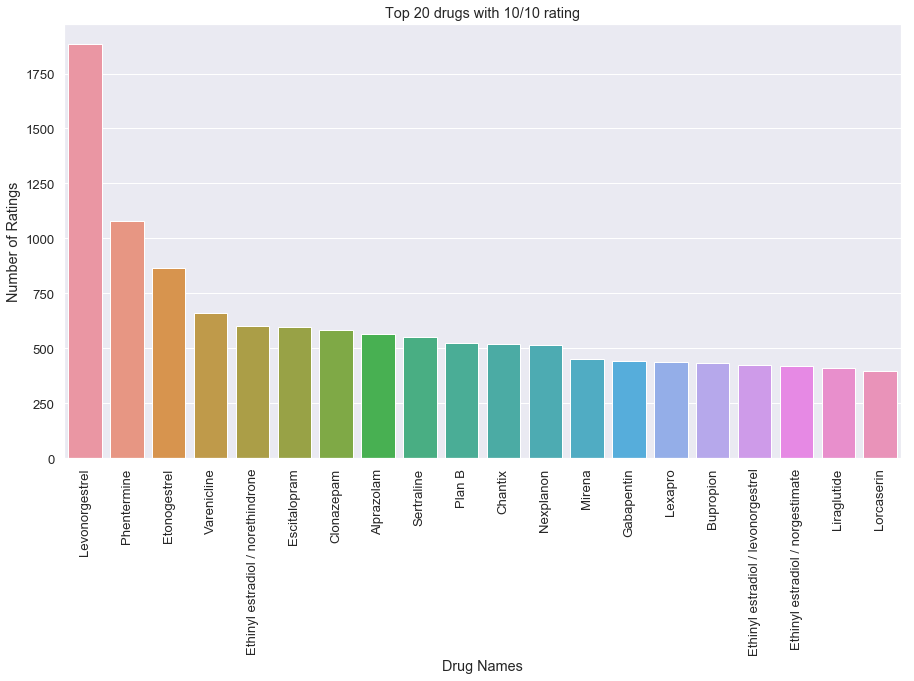

In [21]:
# This barplot shows the top 20 drugs with the 10/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 10, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20])

sns_rating.set_title('Top 20 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

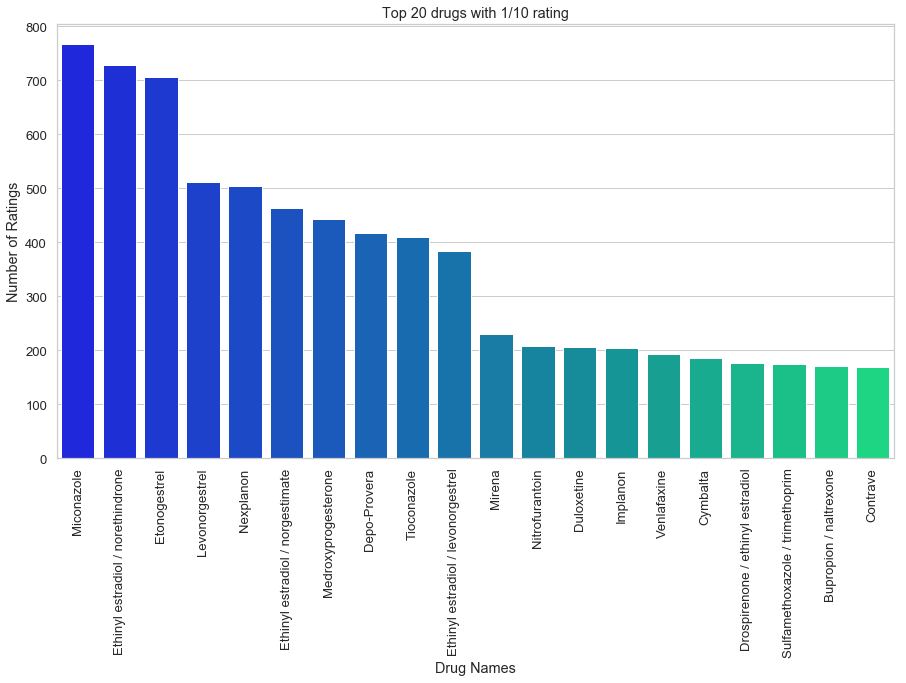

In [22]:
# This barplot shows the Top 20 drugs with the 1/10 rating
import seaborn as sns

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [15, 8]

rating = dict(df_data.loc[df_data.rating == 1, "drugname"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:20], y = drug_rating[0:20], palette = 'winter')

sns_rating.set_title('Top 20 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

Text(0.5, 0, 'Rating')

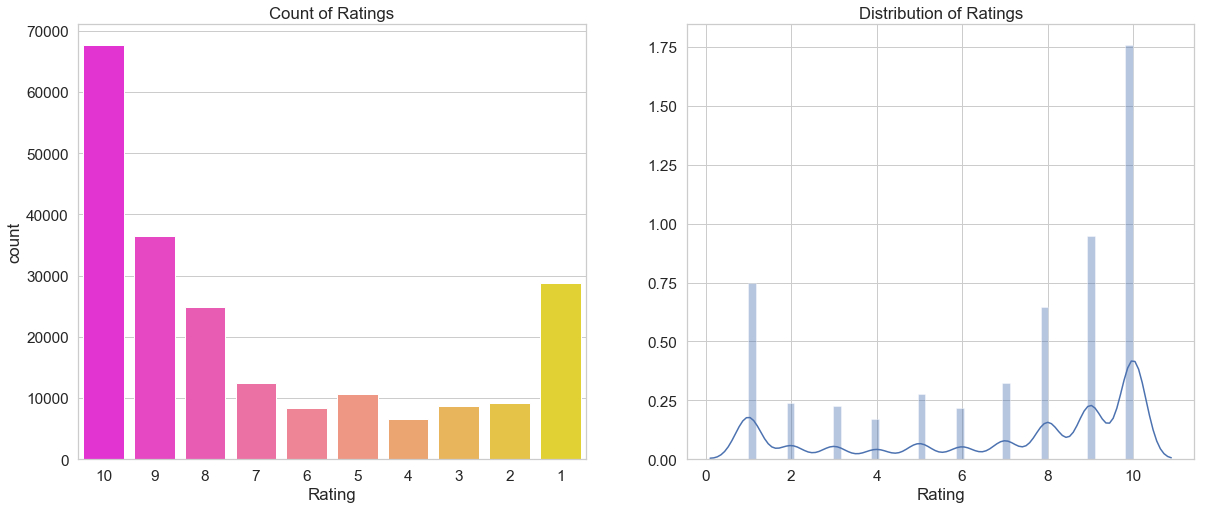

In [23]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df_data['rating'], palette = 'spring', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df_data['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

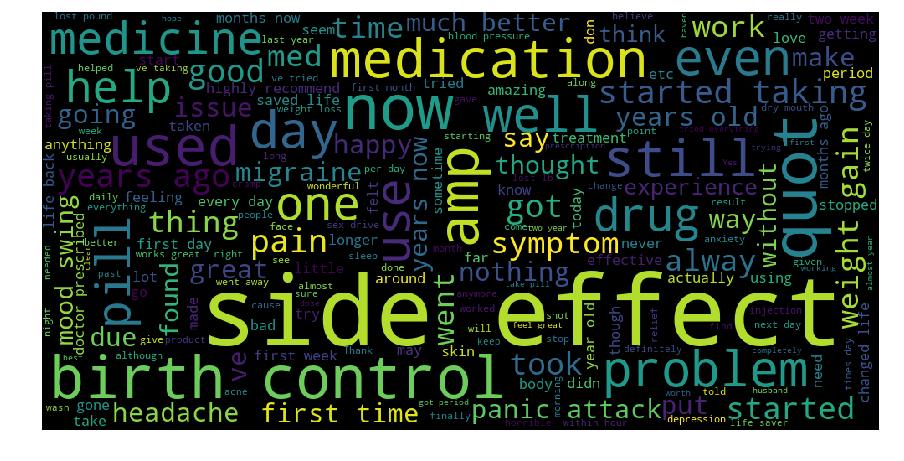

In [24]:
# Word cloud of the reviews with rating equal to 10
df_rate_ten = df_data.loc[df_data.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

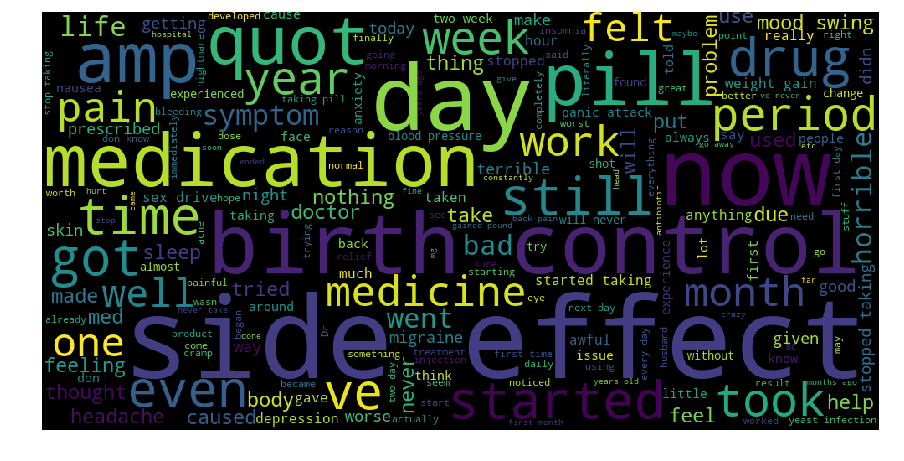

In [25]:
# Word cloud of the reviews with rating equal to 1
df_rate_one = df_data.loc[df_data.rating == 1, 'review']
k1 = (' '.join(df_rate_one))

wordcloud = WordCloud(width = 1000, height = 500).generate(k1)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

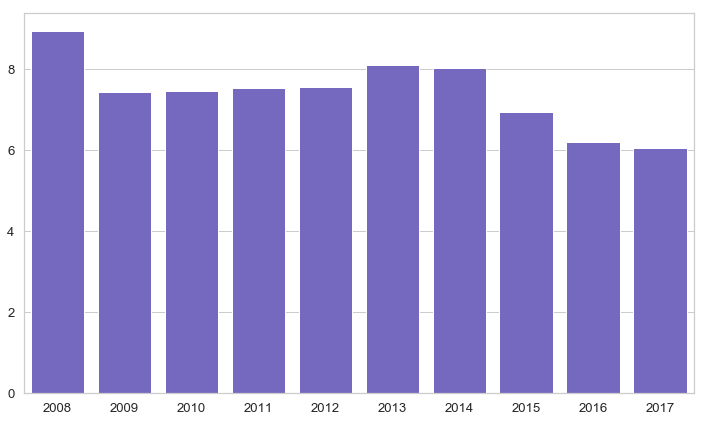

In [26]:
# This barplot shows the mean rating per year

mean_rating = dict(df_data.groupby(df_data['date'].dt.year)['rating'].mean())
plt.rcParams['figure.figsize'] = [12, 7]
sns.set(font_scale = 1.2, style = 'whitegrid')
sns.barplot(x = list(mean_rating.keys()), y = list(mean_rating.values()), color = 'slateblue');

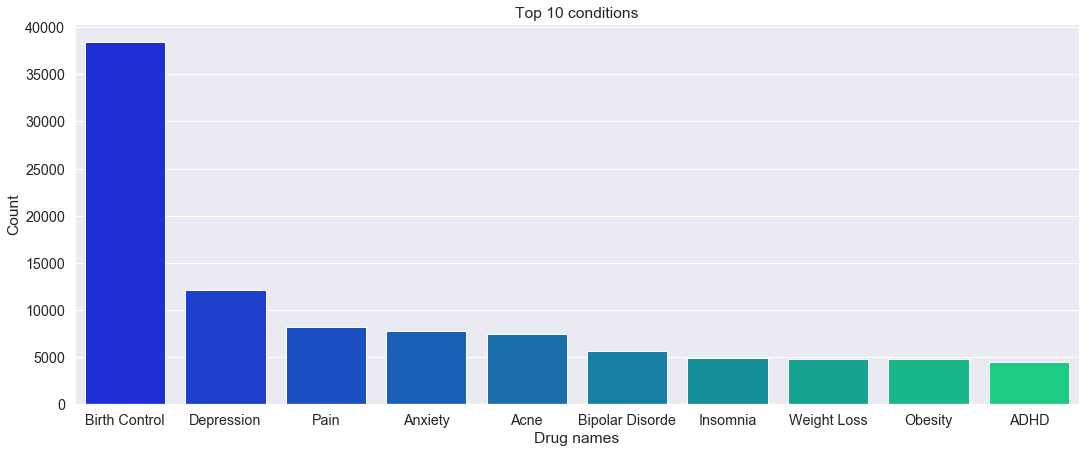

In [27]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df_data['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, palette = 'winter')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Drug names")
sns_.set_ylabel("Count");

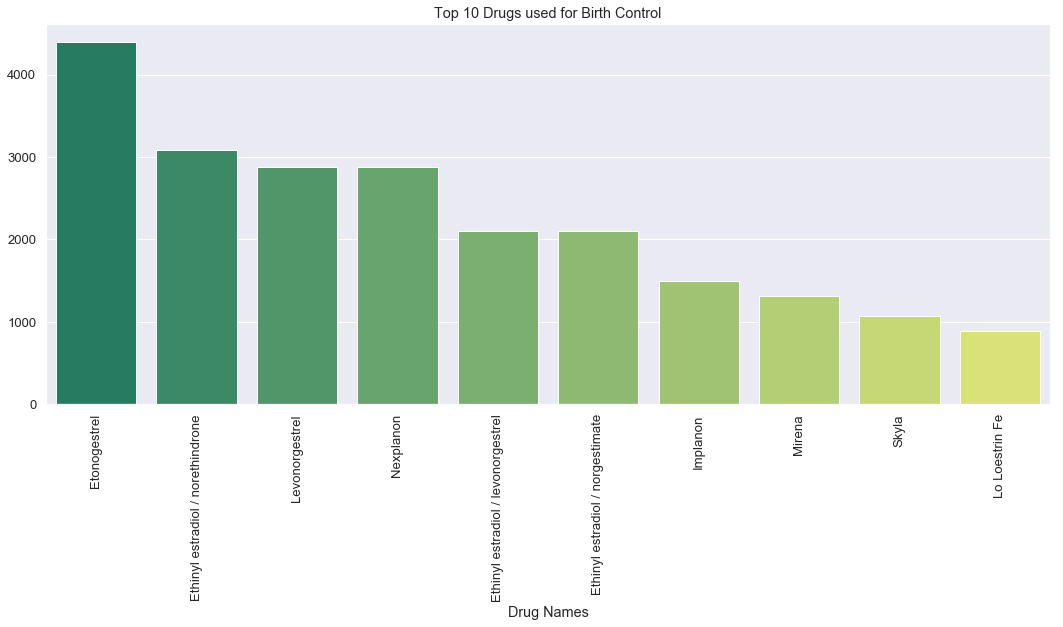

In [28]:
# Top 10 drugs which are used for the top condition, that is Birth Control
df = df_data[df_data['condition'] == 'Birth Control']['drugname'].value_counts()[0: 10]
sns.set(font_scale = 1.2, style = 'darkgrid')

sns_ = sns.barplot(x = df.index, y = df.values, palette = 'summer')
sns_.set_xlabel('Drug Names')
sns_.set_title("Top 10 Drugs used for Birth Control")
plt.setp(sns_.get_xticklabels(), rotation = 90);

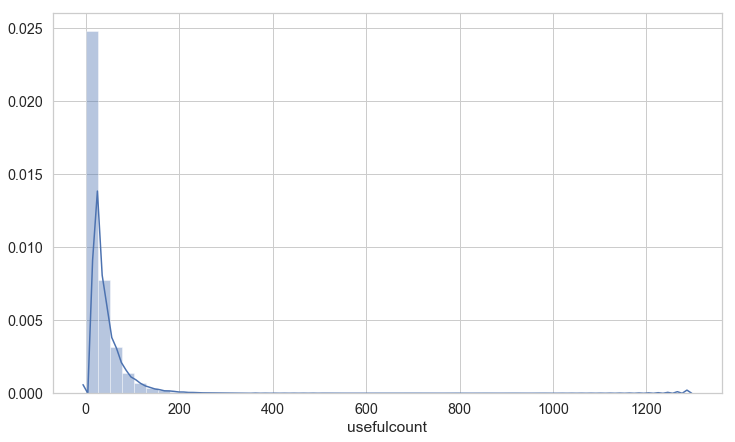

In [29]:
# Distribution of the useful count
sns.set(style = 'whitegrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [12, 7]
sns.distplot(df_data['usefulcount'].dropna())

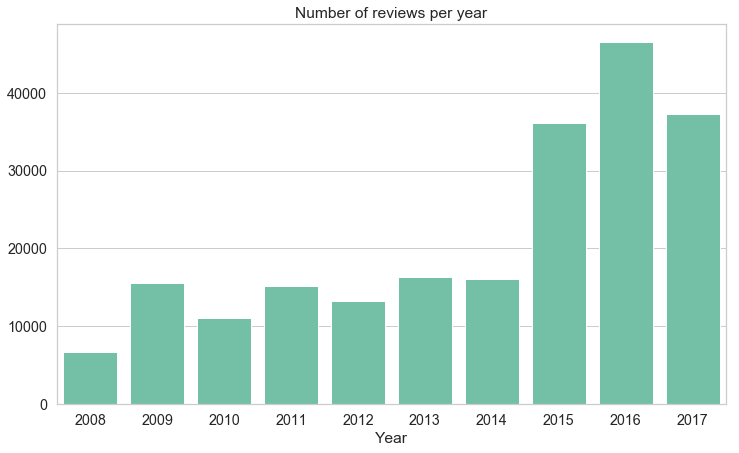

In [30]:
# This barplot shows the number of reviews per year
df = df_data['date'].dt.year.value_counts()
df = df.sort_index()

sns_ = sns.barplot(x = df.index, y = df.values, color = 'mediumaquamarine')
sns_.set_title("Number of reviews per year")
sns_.set_xlabel("Year");

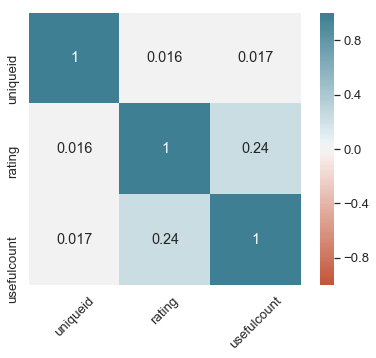

In [89]:
# Heatmap of the correlation matrix
plt.rcParams['figure.figsize'] = [7,5]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_heat = sns.heatmap(corr, annot = True, vmin=-1, vmax=1, center=0,
            cmap=sns.diverging_palette(20, 220, n=200), square=True);
plt.setp(sns_heat.get_xticklabels(), rotation = 45);

In [32]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4


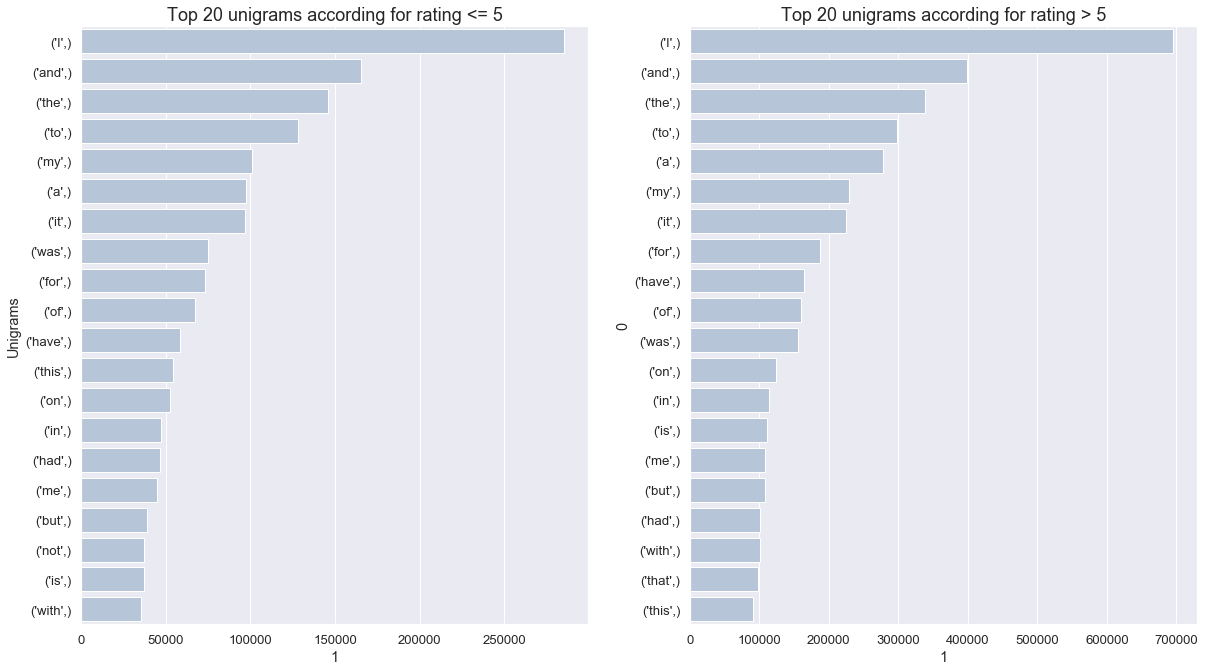

In [33]:
# Top 20 unigrams according to the rating
df_ = df_data[['rating', 'review']]
df_['review'] = df_data['review'].str.replace("&#039;", "")
df_['review'] = df_['review'].str.replace(r'[^\w\d\s]',' ')

df_review_5 = " ".join(df_.loc[df_.rating <= 5, 'review'])
df_review_10 = " ".join(df_.loc[df_.rating > 5, 'review'])

token_review_5 = word_tokenize(df_review_5)
token_review_10 = word_tokenize(df_review_10)

unigrams_5 = ngrams(token_review_5, 1)
unigrams_10 = ngrams(token_review_10, 1)

frequency_5 = Counter(unigrams_5)
frequency_10 = Counter(unigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 unigrams
plt.rcParams['figure.figsize'] = [20,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.5, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'lightsteelblue', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'lightsteelblue', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 unigrams according for rating <= 5")
sns_10.set_title("Top 20 unigrams according for rating > 5")
sns_5.set_ylabel("Unigrams");

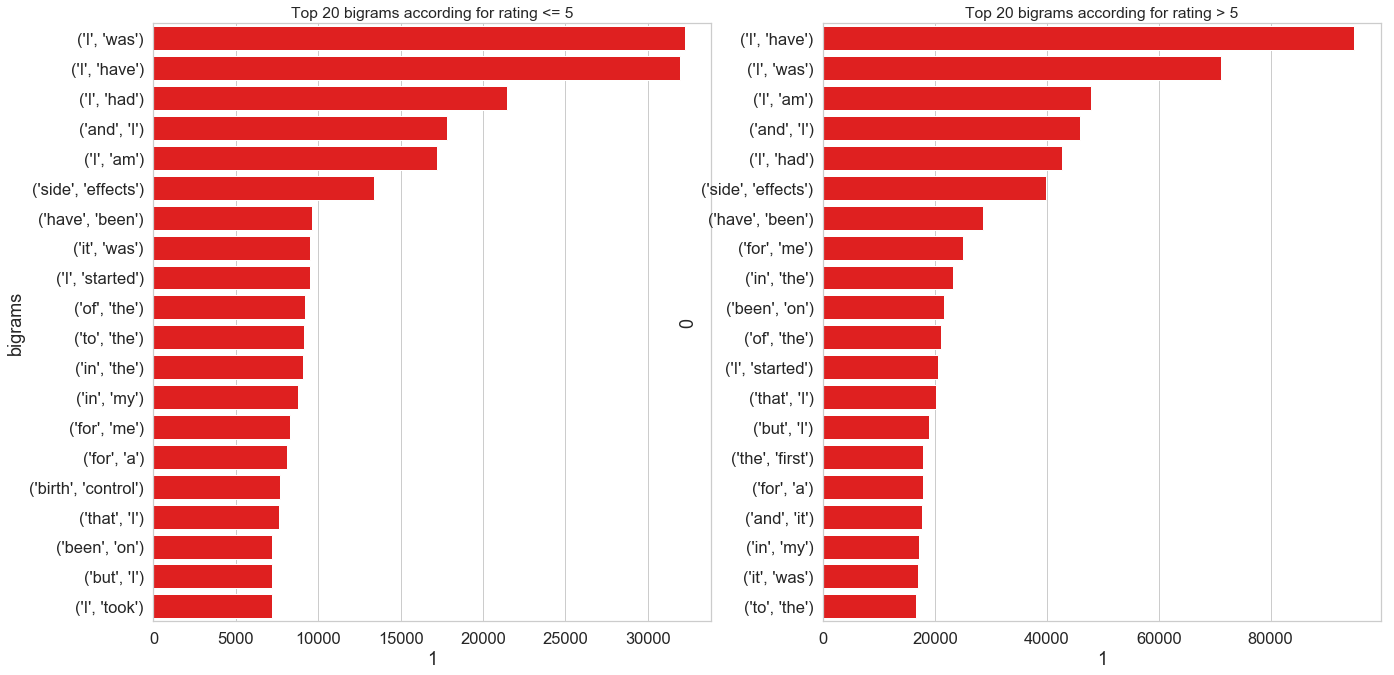

In [34]:
# Top 20 bigrams according to the rating
bigrams_5 = ngrams(token_review_5, 2)
bigrams_10 = ngrams(token_review_10, 2)

frequency_5 = Counter(bigrams_5)
frequency_10 = Counter(bigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 bigrams
plt.rcParams['figure.figsize'] = [22,11]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'red', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'red', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 bigrams according for rating <= 5")
sns_10.set_title("Top 20 bigrams according for rating > 5")
sns_5.set_ylabel("bigrams");

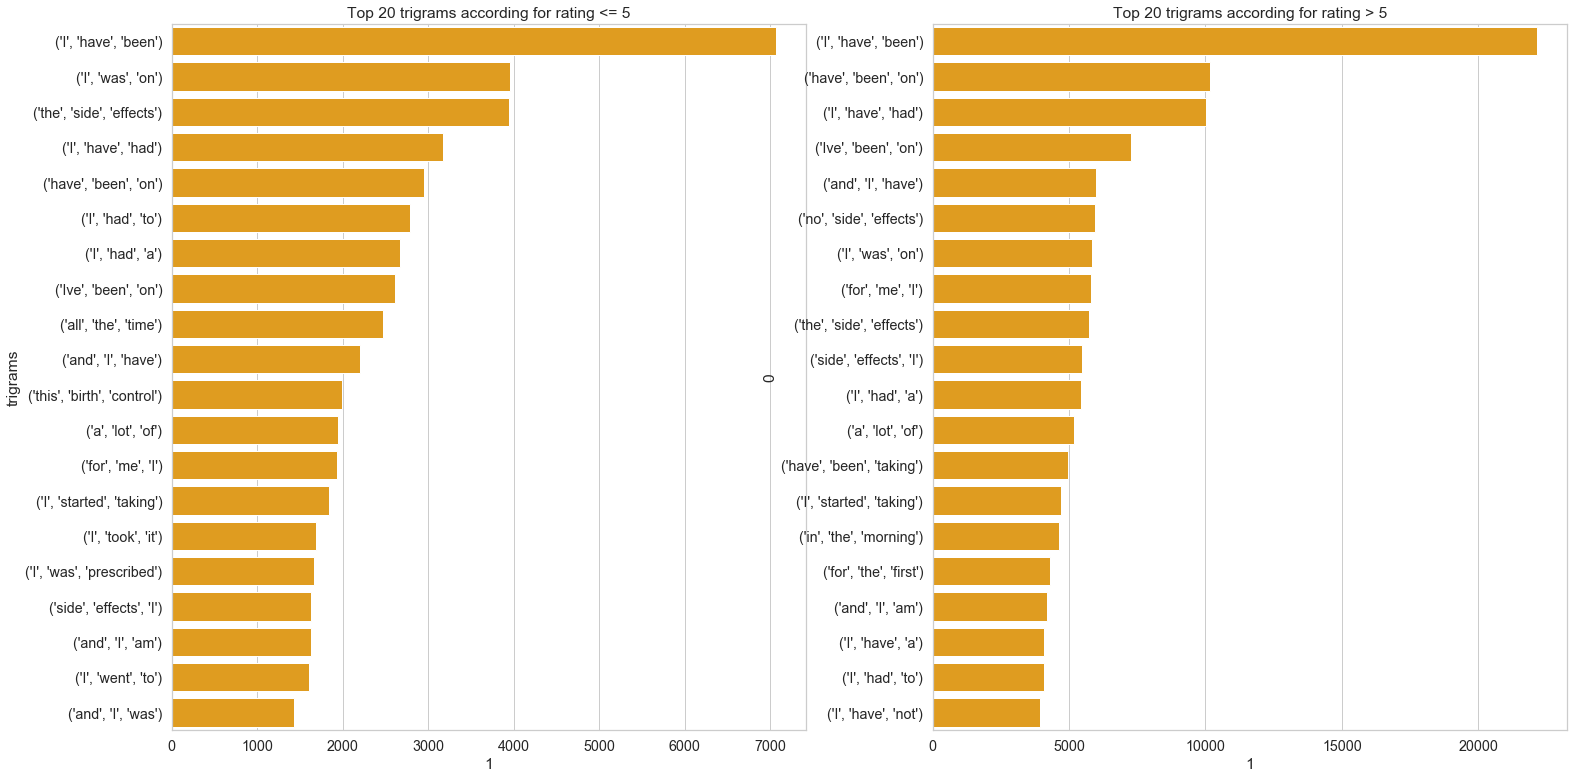

In [35]:
# Top 20 trigrams according to the rating
trigrams_5 = ngrams(token_review_5, 3)
trigrams_10 = ngrams(token_review_10, 3)

frequency_5 = Counter(trigrams_5)
frequency_10 = Counter(trigrams_10)

df_5 = pd.DataFrame(frequency_5.most_common(20))
df_10 = pd.DataFrame(frequency_10.most_common(20))

# Barplot that shows the top 20 trigrams
plt.rcParams['figure.figsize'] = [25,13]
fig, ax = plt.subplots(1,2)
sns.set(font_scale = 1.3, style = 'whitegrid')

sns_5 = sns.barplot(x = df_5[1], y = df_5[0], color = 'orange', ax = ax[0])
sns_10 = sns.barplot(x = df_10[1], y = df_10[0], color = 'orange', ax = ax[1])

# Setting axes labels
sns_5.set_title("Top 20 trigrams according for rating <= 5")
sns_10.set_title("Top 20 trigrams according for rating > 5")
sns_5.set_ylabel("trigrams");

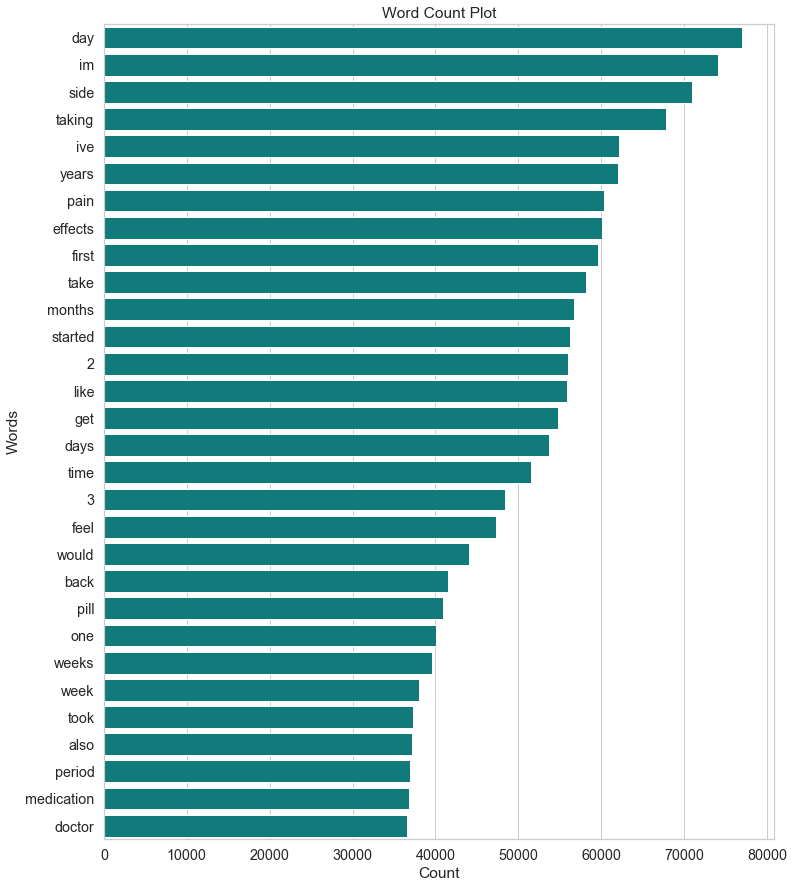

In [36]:
# Word count plot

# Removing the stop words before plotting
stop_words = set(stopwords.words('english'))
df_['review'] = df_['review'].str.lower()
df_['review_1'] = df_['review'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))
df_review = " ".join(df_['review_1'])
tokenize = word_tokenize(df_review)
frequency = Counter(tokenize)
df = pd.DataFrame(frequency.most_common(30))

plt.rcParams['figure.figsize'] = [12, 15]
sns.set(font_scale = 1.3, style = 'whitegrid')

# plotting
word_count = sns.barplot(x = df[1], y = df[0], color = 'darkcyan')
word_count.set_title("Word Count Plot")
word_count.set_ylabel("Words")
word_count.set_xlabel("Count");

### Preprocessing the reviews for the best polarity and classification

In [37]:
# Giving the Sentiment according to the ratings
df_data['sentiment_rate'] = df_data['rating'].apply(lambda x: 1 if x > 5 else 0)

In [38]:
def review_clean(review): 
    # changing to lower case
    lower = review.str.lower()
    
    # Replacing the repeating pattern of &#039;
    pattern_remove = lower.str.replace("&#039;", "")
    
    # Removing all the special Characters
    special_remove = pattern_remove.str.replace(r'[^\w\d\s]',' ')
    
    # Removing all the non ASCII characters
    ascii_remove = special_remove.str.replace(r'[^\x00-\x7F]+',' ')
    
    # Removing the leading and trailing Whitespaces
    whitespace_remove = ascii_remove.str.replace(r'^\s+|\s+?$','')
    
    # Replacing multiple Spaces with Single Space
    multiw_remove = whitespace_remove.str.replace(r'\s+',' ')
    
    # Replacing Two or more dots with one
    dataframe = multiw_remove.str.replace(r'\.{2,}', ' ')
    
    return dataframe

In [39]:
#df_data['review_clean'] = df_data['review'].apply(review_clean)
df_data['review_clean'] = review_clean(df_data['review'])

In [40]:
# Removing the stopwords
stop_words = set(stopwords.words('english'))
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

In [41]:
# Removing the word stems using the Snowball Stemmer
Snow_ball = SnowballStemmer("english")
df_data['review_clean'] = df_data['review_clean'].apply(lambda x: " ".join(Snow_ball.stem(word) for word in x.split()))

In [42]:
df_data['review_clean'][0: 20]

0     depo inject sinc januari 2015 bleed stop anoth...
1     im 21 year old recent found might pcos havent ...
2     shot 11 year month ago never 1 period even spo...
3     ive four shot point birth control pill year du...
4     total 3 shot got first one leav hospit give bi...
5     horribl shot got first shot august ever sinc e...
6     im 18 got heavi bleed ive alway heard bc make ...
7     im 19 heavi pain period sinc forev got depo sh...
8     im 30 year old woman got shot august 9th bleed...
9     im 17 year old got shot august 2015 person don...
10    first month awesom absolut wonder start light ...
11    start depo shot year ago origin bled 3 week da...
12    im 24 ive 2 year quit period last 3 week first...
13    im 17 went depo heavi bleed like heavi would g...
14    love conveni one shot everi three month look b...
15    1st shot sept 2nd nonstop bleed sinc side effe...
16    took shot safe im young teenag sexual activ bi...
17    ive shot 2 year amp one complaint skin cou

In [43]:
# Separating the day, month and year from the Date
df_data['day'] = df_data['date'].dt.day
df_data['month'] = df_data['date'].dt.month
df_data['year'] = df_data['date'].dt.year

In [44]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [45]:
def sentiment(review):
    # Sentiment polarity of the reviews
    pol = []
    for i in review:
        analysis = TextBlob(i)
        pol.append(analysis.sentiment.polarity)
    return pol

In [46]:
df_data.head()

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015


In [47]:
df_data['sentiment'] = sentiment(df_data['review'])

In [48]:
df_data['sentiment_clean'] = sentiment(df_data['review_clean'])

The Correlation coefficient between the sentiment of the uncleaned review with rating is greater than the cleaned review, so now lets try without the snowball stemmer and without removing the stopwords.

In [49]:
np.corrcoef(df_data['sentiment'], df_data['rating'])

array([[1.       , 0.3481753],
       [0.3481753, 1.       ]])

In [50]:
np.corrcoef(df_data['sentiment_clean'], df_data['rating'])

array([[1.        , 0.23328393],
       [0.23328393, 1.        ]])

In [51]:
# Cleaning the reviews without removing the stop words and using snowball stemmer
df_data['review_clean_ss'] = review_clean(df_data['review'])
df_data['sentiment_clean_ss'] = sentiment(df_data['review_clean_ss'])

In [52]:
np.corrcoef(df_data['sentiment_clean_ss'], df_data['rating'])

array([[1.        , 0.34600369],
       [0.34600369, 1.        ]])

In [53]:
df_data['condition'].value_counts().head(20)

Birth Control                38436
Depression                   12164
Pain                          8245
Anxiety                       7812
Acne                          7435
Bipolar Disorde               5604
Insomnia                      4904
Weight Loss                   4857
Obesity                       4757
ADHD                          4509
Diabetes, Type 2              3362
Emergency Contraception       3290
High Blood Pressure           3104
Vaginal Yeast Infection       3085
Abnormal Uterine Bleeding     2744
Bowel Preparation             2498
Smoking Cessation             2440
ibromyalgia                   2370
Migraine                      2277
Anxiety and Stress            2236
Name: condition, dtype: int64

In [54]:
df_data.head(10)

,uniqueid,drugname,condition,review,rating,date,usefulcount,sentiment_rate,review_clean,day,month,year,sentiment,sentiment_clean,review_clean_ss,sentiment_clean_ss
0,0,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Been on the depo injection since January 2015...",3,2015-10-28,4,0,depo inject sinc januari 2015 bleed stop anoth...,28,10,2015,-0.287798,-0.127381,been on the depo injection since january 2015 ...,-0.160714
1,2,Medroxyprogesterone,Amenorrhea,"""I&#039;m 21 years old and recently found out ...",10,2015-10-27,11,1,im 21 year old recent found might pcos havent ...,27,10,2015,0.175357,0.161429,im 21 years old and recently found out i might...,0.175357
2,3,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I have been on the shot 11 years and until a ...",8,2015-10-27,7,1,shot 11 year month ago never 1 period even spo...,27,10,2015,-0.210000,0.233333,i have been on the shot 11 years and until a m...,-0.210000
3,4,Medroxyprogesterone,Birth Control,"""Ive had four shots at this point. I was on bi...",9,2015-10-26,12,1,ive four shot point birth control pill year du...,26,10,2015,-0.022500,0.069444,ive had four shots at this point i was on birt...,-0.033333
4,5,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I had a total of 3 shots. I got my first one ...",1,2015-10-25,4,0,total 3 shot got first one leav hospit give bi...,25,10,2015,0.044872,0.103333,i had a total of 3 shots i got my first one be...,0.044872
5,6,Medroxyprogesterone,Birth Control,"""This is a horrible shot!! I got my first shot...",1,2015-10-24,3,0,horribl shot got first shot august ever sinc e...,24,10,2015,0.000321,0.013235,this is a horrible shot i got my first shot in...,0.000321
6,7,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 18 and got this for heavy bleeding. ...",5,2015-10-22,6,0,im 18 got heavi bleed ive alway heard bc make ...,22,10,2015,-0.056692,0.098052,im 18 and got this for heavy bleeding ive alwa...,-0.065025
7,8,Medroxyprogesterone,Abnormal Uterine Bleeding,"""Im 19 and have been having heavy and painful ...",5,2015-10-21,2,0,im 19 heavi pain period sinc forev got depo sh...,21,10,2015,0.030995,0.068750,im 19 and have been having heavy and painful p...,0.026923
8,9,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m a 30 year old woman. I got the shot ...",2,2015-10-21,5,0,im 30 year old woman got shot august 9th bleed...,21,10,2015,0.265309,0.288889,im a 30 year old woman i got the shot on augus...,0.265309
9,10,Medroxyprogesterone,Abnormal Uterine Bleeding,"""I&#039;m 17 years old and I got shot in Augus...",7,2015-10-20,2,1,im 17 year old got shot august 2015 person don...,20,10,2015,-0.047222,-0.022500,im 17 years old and i got shot in august 2015 ...,-0.047222


### Feature Engineering

In [55]:
#Word count in each review
df_data['count_word']=df_data["review_clean_ss"].apply(lambda x: len(str(x).split()))

#Unique word count 
df_data['count_unique_word']=df_data["review_clean_ss"].apply(lambda x: len(set(str(x).split())))

#Letter count
df_data['count_letters']=df_data["review_clean_ss"].apply(lambda x: len(str(x)))

#punctuation count
df_data["count_punctuations"] = df_data["review"].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#upper case words count
df_data["count_words_upper"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.isupper()]))

#title case words count
df_data["count_words_title"] = df_data["review"].apply(lambda x: len([w for w in str(x).split() if w.istitle()]))

#Number of stopwords
df_data["count_stopwords"] = df_data["review"].apply(lambda x: len([w for w in str(x).lower().split() if w in stop_words]))

#Average length of the words
df_data["mean_word_len"] = df_data["review_clean_ss"].apply(lambda x: np.mean([len(w) for w in str(x).split()]))

In [56]:
df_data.columns

Index(['uniqueid', 'drugname', 'condition', 'review', 'rating', 'date',
       'usefulcount', 'sentiment_rate', 'review_clean', 'day', 'month', 'year',
       'sentiment', 'sentiment_clean', 'review_clean_ss', 'sentiment_clean_ss',
       'count_word', 'count_unique_word', 'count_letters',
       'count_punctuations', 'count_words_upper', 'count_words_title',
       'count_stopwords', 'mean_word_len'],
      dtype='object')

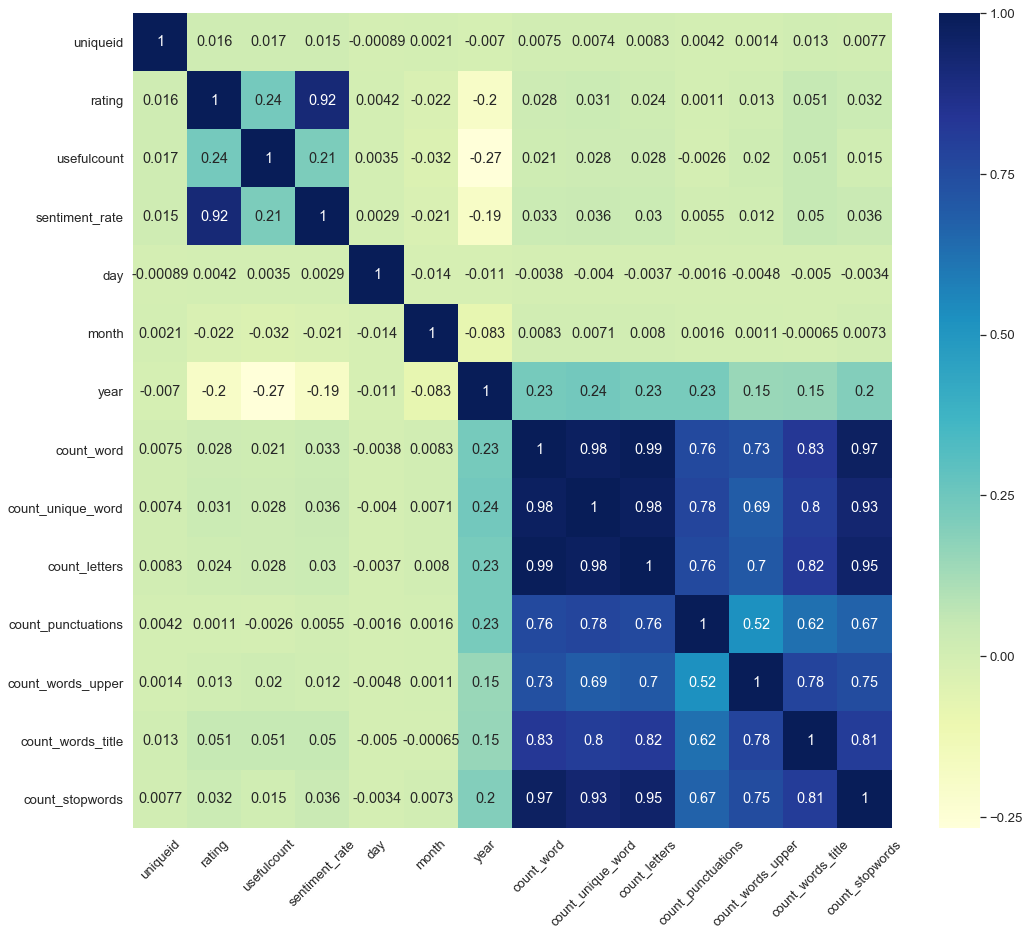

In [60]:
# Correlation Heatmap of the features engineered
plt.rcParams['figure.figsize'] = [17,15]
sns.set(font_scale = 1.2)
corr = df_data.select_dtypes(include = 'int64').corr()
sns_ = sns.heatmap(corr, annot = True, cmap = 'YlGnBu')
plt.setp(sns_.get_xticklabels(), rotation = 45);

In [61]:
# Label Encoding Drugname and Conditions
from sklearn.preprocessing import LabelEncoder
label_encoder_feat = {}
for feature in ['drugname', 'condition']:
    label_encoder_feat[feature] = LabelEncoder()
    df_data[feature] = label_encoder_feat[feature].fit_transform(df_data[feature])

### Modelling

In [62]:
# Importing Libraries for the Machine Learning Model
from xgboost import XGBClassifier
from lightgbm import LGBMModel,LGBMClassifier, plot_importance
from catboost import CatBoostClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [63]:
# Defining Features and splitting the data as train and test set

features = df_data[['condition', 'usefulcount', 'sentiment', 'day', 'month', 'year',
                   'sentiment_clean_ss', 'count_word', 'count_unique_word', 'count_letters',
                   'count_punctuations', 'count_words_upper', 'count_words_title',
                   'count_stopwords', 'mean_word_len']]

target = df_data['sentiment_rate']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42)
print ("The Train set size ", X_train.shape)
print ("The Test set size ", X_test.shape)

The Train set size  (149708, 15)
The Test set size  (64161, 15)


Model - I LightGBM

In [64]:
# Training Model - I
clf = LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )
model = clf.fit(X_train, y_train)

# Predictions
predictions = model.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions)

The Accuracy of the model is :  0.8879069839933916
The confusion Matrix is 


array([[14794,  4551],
       [ 2641, 42175]], dtype=int64)

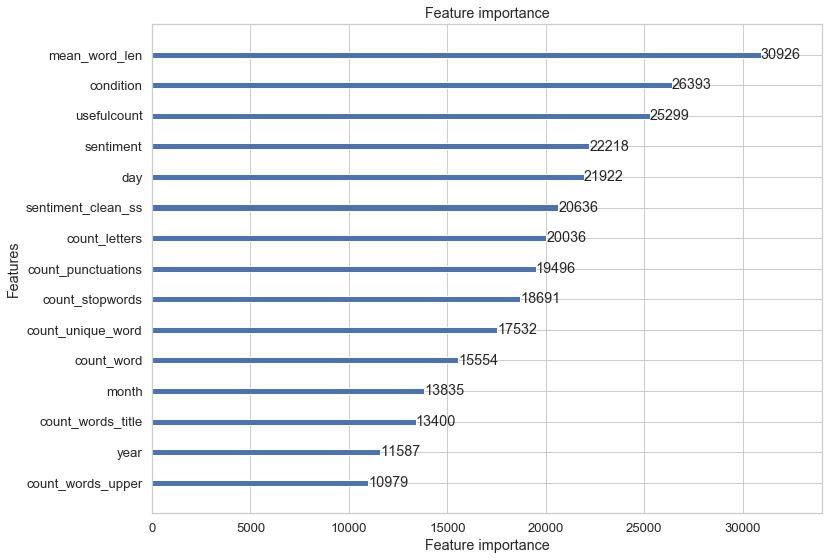

In [65]:
# Feature Importance Plot using LGBM
plt.rcParams['figure.figsize'] = [12, 9]
sns.set(style = 'whitegrid', font_scale = 1.2)
plot_importance(model);

Model - II XGBClassifier

In [66]:
# Training Model - II
from xgboost import plot_importance
xgb_clf = XGBClassifier(n_estimator = 10000,
                    learning_rate=0.10,
                    num_leaves=30)

model_xgb = xgb_clf.fit(X_train, y_train)

# Predictions
predictions_2 = model_xgb.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_2))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_2)

The Accuracy of the model is :  0.7582176088277925
The confusion Matrix is 


array([[ 7374, 11971],
       [ 3542, 41274]], dtype=int64)

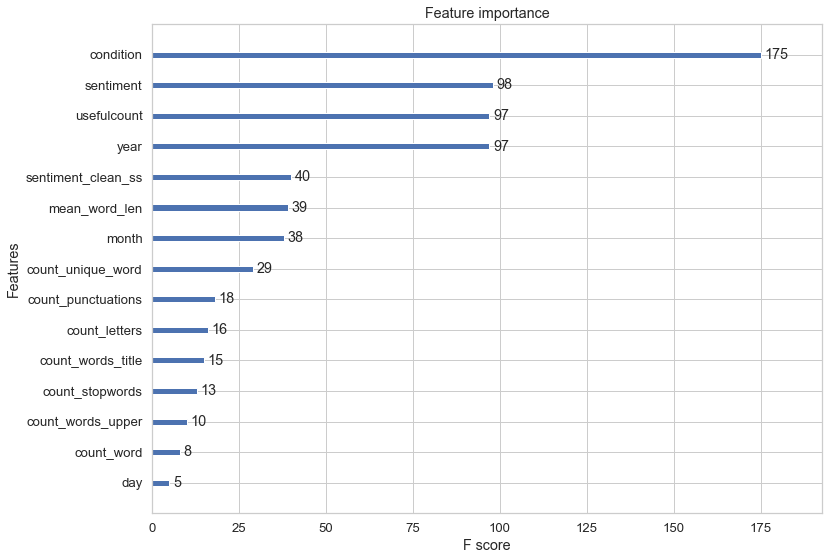

In [67]:
# Feature Importance Plot using XGBClassifier
plt.rcParams['figure.figsize'] = [12, 9]
plot_importance(model_xgb);

Model - III CatBoostClassifier

In [68]:
# Training Model - III
cat_clf = CatBoostClassifier(iterations = 10000,
                            learning_rate = 0.5)

model_cat = cat_clf.fit(X_train, y_train);

# Predictions
predictions_3 = model_cat.predict(X_test)
print ("The Accuracy of the model is : ", accuracy_score(y_test, predictions_3))
print ("The confusion Matrix is ")
confusion_matrix(y_test, predictions_3)

0:	learn: 0.5609381	total: 88.5ms	remaining: 14m 44s
1:	learn: 0.5277483	total: 110ms	remaining: 9m 10s
2:	learn: 0.5150090	total: 132ms	remaining: 7m 20s
3:	learn: 0.5104798	total: 152ms	remaining: 6m 20s
4:	learn: 0.5067295	total: 172ms	remaining: 5m 43s
5:	learn: 0.5043203	total: 194ms	remaining: 5m 23s
6:	learn: 0.5020393	total: 214ms	remaining: 5m 5s
7:	learn: 0.5005295	total: 237ms	remaining: 4m 55s
8:	learn: 0.4987541	total: 260ms	remaining: 4m 48s
9:	learn: 0.4973832	total: 281ms	remaining: 4m 41s
10:	learn: 0.4965061	total: 304ms	remaining: 4m 36s
11:	learn: 0.4954493	total: 328ms	remaining: 4m 32s
12:	learn: 0.4946065	total: 350ms	remaining: 4m 29s
13:	learn: 0.4933793	total: 375ms	remaining: 4m 27s
14:	learn: 0.4928104	total: 397ms	remaining: 4m 23s
15:	learn: 0.4918410	total: 419ms	remaining: 4m 21s
16:	learn: 0.4912259	total: 443ms	remaining: 4m 19s
17:	learn: 0.4905870	total: 465ms	remaining: 4m 18s
18:	learn: 0.4896518	total: 487ms	remaining: 4m 15s
19:	learn: 0.4892999	

162:	learn: 0.4345789	total: 3.86s	remaining: 3m 52s
163:	learn: 0.4344022	total: 3.88s	remaining: 3m 52s
164:	learn: 0.4341319	total: 3.91s	remaining: 3m 52s
165:	learn: 0.4338882	total: 3.93s	remaining: 3m 53s
166:	learn: 0.4336428	total: 3.96s	remaining: 3m 53s
167:	learn: 0.4334298	total: 3.98s	remaining: 3m 53s
168:	learn: 0.4332130	total: 4s	remaining: 3m 52s
169:	learn: 0.4329604	total: 4.03s	remaining: 3m 52s
170:	learn: 0.4327333	total: 4.05s	remaining: 3m 52s
171:	learn: 0.4326249	total: 4.07s	remaining: 3m 52s
172:	learn: 0.4323797	total: 4.1s	remaining: 3m 52s
173:	learn: 0.4320510	total: 4.12s	remaining: 3m 52s
174:	learn: 0.4318028	total: 4.15s	remaining: 3m 52s
175:	learn: 0.4314156	total: 4.17s	remaining: 3m 52s
176:	learn: 0.4311688	total: 4.19s	remaining: 3m 52s
177:	learn: 0.4308659	total: 4.21s	remaining: 3m 52s
178:	learn: 0.4305500	total: 4.24s	remaining: 3m 52s
179:	learn: 0.4303932	total: 4.26s	remaining: 3m 52s
180:	learn: 0.4301034	total: 4.28s	remaining: 3m 5

322:	learn: 0.3964093	total: 7.54s	remaining: 3m 46s
323:	learn: 0.3961635	total: 7.57s	remaining: 3m 46s
324:	learn: 0.3958978	total: 7.59s	remaining: 3m 46s
325:	learn: 0.3956857	total: 7.62s	remaining: 3m 46s
326:	learn: 0.3954732	total: 7.64s	remaining: 3m 45s
327:	learn: 0.3952382	total: 7.66s	remaining: 3m 45s
328:	learn: 0.3950444	total: 7.68s	remaining: 3m 45s
329:	learn: 0.3948036	total: 7.71s	remaining: 3m 45s
330:	learn: 0.3945332	total: 7.73s	remaining: 3m 45s
331:	learn: 0.3942656	total: 7.75s	remaining: 3m 45s
332:	learn: 0.3939829	total: 7.78s	remaining: 3m 45s
333:	learn: 0.3937363	total: 7.8s	remaining: 3m 45s
334:	learn: 0.3935604	total: 7.82s	remaining: 3m 45s
335:	learn: 0.3934386	total: 7.84s	remaining: 3m 45s
336:	learn: 0.3932330	total: 7.87s	remaining: 3m 45s
337:	learn: 0.3929521	total: 7.89s	remaining: 3m 45s
338:	learn: 0.3927870	total: 7.92s	remaining: 3m 45s
339:	learn: 0.3925768	total: 7.94s	remaining: 3m 45s
340:	learn: 0.3923209	total: 7.96s	remaining: 3

479:	learn: 0.3646235	total: 11.2s	remaining: 3m 41s
480:	learn: 0.3644424	total: 11.2s	remaining: 3m 41s
481:	learn: 0.3642787	total: 11.2s	remaining: 3m 41s
482:	learn: 0.3640777	total: 11.2s	remaining: 3m 41s
483:	learn: 0.3638914	total: 11.3s	remaining: 3m 41s
484:	learn: 0.3636668	total: 11.3s	remaining: 3m 41s
485:	learn: 0.3634361	total: 11.3s	remaining: 3m 41s
486:	learn: 0.3633299	total: 11.3s	remaining: 3m 41s
487:	learn: 0.3631117	total: 11.4s	remaining: 3m 41s
488:	learn: 0.3628480	total: 11.4s	remaining: 3m 41s
489:	learn: 0.3626921	total: 11.4s	remaining: 3m 41s
490:	learn: 0.3625199	total: 11.4s	remaining: 3m 41s
491:	learn: 0.3622930	total: 11.5s	remaining: 3m 41s
492:	learn: 0.3619864	total: 11.5s	remaining: 3m 41s
493:	learn: 0.3617571	total: 11.5s	remaining: 3m 41s
494:	learn: 0.3615907	total: 11.5s	remaining: 3m 41s
495:	learn: 0.3613784	total: 11.6s	remaining: 3m 41s
496:	learn: 0.3611590	total: 11.6s	remaining: 3m 41s
497:	learn: 0.3609559	total: 11.6s	remaining: 

640:	learn: 0.3360854	total: 15s	remaining: 3m 39s
641:	learn: 0.3359467	total: 15s	remaining: 3m 39s
642:	learn: 0.3358053	total: 15.1s	remaining: 3m 39s
643:	learn: 0.3356815	total: 15.1s	remaining: 3m 39s
644:	learn: 0.3355428	total: 15.1s	remaining: 3m 39s
645:	learn: 0.3353895	total: 15.1s	remaining: 3m 39s
646:	learn: 0.3352213	total: 15.2s	remaining: 3m 39s
647:	learn: 0.3350057	total: 15.2s	remaining: 3m 39s
648:	learn: 0.3348514	total: 15.2s	remaining: 3m 39s
649:	learn: 0.3346669	total: 15.2s	remaining: 3m 39s
650:	learn: 0.3345178	total: 15.3s	remaining: 3m 39s
651:	learn: 0.3343244	total: 15.3s	remaining: 3m 39s
652:	learn: 0.3341538	total: 15.3s	remaining: 3m 39s
653:	learn: 0.3339943	total: 15.3s	remaining: 3m 38s
654:	learn: 0.3338125	total: 15.3s	remaining: 3m 38s
655:	learn: 0.3336178	total: 15.4s	remaining: 3m 38s
656:	learn: 0.3334589	total: 15.4s	remaining: 3m 38s
657:	learn: 0.3332953	total: 15.4s	remaining: 3m 38s
658:	learn: 0.3331699	total: 15.4s	remaining: 3m 3

800:	learn: 0.3110233	total: 18.7s	remaining: 3m 35s
801:	learn: 0.3108904	total: 18.8s	remaining: 3m 35s
802:	learn: 0.3106760	total: 18.8s	remaining: 3m 35s
803:	learn: 0.3105698	total: 18.8s	remaining: 3m 35s
804:	learn: 0.3103962	total: 18.8s	remaining: 3m 35s
805:	learn: 0.3102857	total: 18.9s	remaining: 3m 35s
806:	learn: 0.3101323	total: 18.9s	remaining: 3m 35s
807:	learn: 0.3098831	total: 18.9s	remaining: 3m 35s
808:	learn: 0.3097283	total: 18.9s	remaining: 3m 35s
809:	learn: 0.3095889	total: 19s	remaining: 3m 35s
810:	learn: 0.3094801	total: 19s	remaining: 3m 35s
811:	learn: 0.3093779	total: 19s	remaining: 3m 34s
812:	learn: 0.3092610	total: 19s	remaining: 3m 34s
813:	learn: 0.3090824	total: 19s	remaining: 3m 34s
814:	learn: 0.3088863	total: 19.1s	remaining: 3m 34s
815:	learn: 0.3087820	total: 19.1s	remaining: 3m 34s
816:	learn: 0.3087309	total: 19.1s	remaining: 3m 34s
817:	learn: 0.3085684	total: 19.1s	remaining: 3m 34s
818:	learn: 0.3083959	total: 19.2s	remaining: 3m 34s
819

957:	learn: 0.2891228	total: 22.4s	remaining: 3m 31s
958:	learn: 0.2889811	total: 22.4s	remaining: 3m 31s
959:	learn: 0.2888168	total: 22.5s	remaining: 3m 31s
960:	learn: 0.2886644	total: 22.5s	remaining: 3m 31s
961:	learn: 0.2885145	total: 22.5s	remaining: 3m 31s
962:	learn: 0.2883864	total: 22.5s	remaining: 3m 31s
963:	learn: 0.2882098	total: 22.5s	remaining: 3m 31s
964:	learn: 0.2880999	total: 22.6s	remaining: 3m 31s
965:	learn: 0.2879286	total: 22.6s	remaining: 3m 31s
966:	learn: 0.2877851	total: 22.6s	remaining: 3m 31s
967:	learn: 0.2877461	total: 22.6s	remaining: 3m 31s
968:	learn: 0.2876584	total: 22.7s	remaining: 3m 31s
969:	learn: 0.2875471	total: 22.7s	remaining: 3m 31s
970:	learn: 0.2874327	total: 22.7s	remaining: 3m 31s
971:	learn: 0.2873282	total: 22.7s	remaining: 3m 31s
972:	learn: 0.2873077	total: 22.8s	remaining: 3m 31s
973:	learn: 0.2872337	total: 22.8s	remaining: 3m 31s
974:	learn: 0.2871015	total: 22.8s	remaining: 3m 31s
975:	learn: 0.2869254	total: 22.8s	remaining: 

1112:	learn: 0.2692405	total: 26s	remaining: 3m 27s
1113:	learn: 0.2690792	total: 26s	remaining: 3m 27s
1114:	learn: 0.2689281	total: 26s	remaining: 3m 27s
1115:	learn: 0.2688644	total: 26.1s	remaining: 3m 27s
1116:	learn: 0.2687819	total: 26.1s	remaining: 3m 27s
1117:	learn: 0.2686250	total: 26.1s	remaining: 3m 27s
1118:	learn: 0.2684768	total: 26.1s	remaining: 3m 27s
1119:	learn: 0.2683423	total: 26.2s	remaining: 3m 27s
1120:	learn: 0.2682024	total: 26.2s	remaining: 3m 27s
1121:	learn: 0.2680985	total: 26.2s	remaining: 3m 27s
1122:	learn: 0.2680082	total: 26.2s	remaining: 3m 27s
1123:	learn: 0.2679186	total: 26.2s	remaining: 3m 27s
1124:	learn: 0.2677958	total: 26.3s	remaining: 3m 27s
1125:	learn: 0.2676841	total: 26.3s	remaining: 3m 27s
1126:	learn: 0.2675908	total: 26.3s	remaining: 3m 27s
1127:	learn: 0.2674528	total: 26.3s	remaining: 3m 27s
1128:	learn: 0.2673511	total: 26.4s	remaining: 3m 27s
1129:	learn: 0.2672232	total: 26.4s	remaining: 3m 27s
1130:	learn: 0.2671381	total: 26.4

1272:	learn: 0.2505603	total: 29.8s	remaining: 3m 23s
1273:	learn: 0.2504834	total: 29.8s	remaining: 3m 23s
1274:	learn: 0.2503099	total: 29.8s	remaining: 3m 23s
1275:	learn: 0.2502148	total: 29.8s	remaining: 3m 23s
1276:	learn: 0.2501206	total: 29.8s	remaining: 3m 23s
1277:	learn: 0.2499334	total: 29.9s	remaining: 3m 23s
1278:	learn: 0.2498215	total: 29.9s	remaining: 3m 23s
1279:	learn: 0.2496858	total: 29.9s	remaining: 3m 23s
1280:	learn: 0.2495055	total: 29.9s	remaining: 3m 23s
1281:	learn: 0.2494047	total: 30s	remaining: 3m 23s
1282:	learn: 0.2492656	total: 30s	remaining: 3m 23s
1283:	learn: 0.2491877	total: 30s	remaining: 3m 23s
1284:	learn: 0.2490675	total: 30s	remaining: 3m 23s
1285:	learn: 0.2489164	total: 30.1s	remaining: 3m 23s
1286:	learn: 0.2488080	total: 30.1s	remaining: 3m 23s
1287:	learn: 0.2487246	total: 30.1s	remaining: 3m 23s
1288:	learn: 0.2486257	total: 30.1s	remaining: 3m 23s
1289:	learn: 0.2485189	total: 30.1s	remaining: 3m 23s
1290:	learn: 0.2484062	total: 30.2s	

1426:	learn: 0.2332418	total: 33.3s	remaining: 3m 20s
1427:	learn: 0.2331052	total: 33.4s	remaining: 3m 20s
1428:	learn: 0.2330322	total: 33.4s	remaining: 3m 20s
1429:	learn: 0.2328838	total: 33.4s	remaining: 3m 20s
1430:	learn: 0.2327488	total: 33.4s	remaining: 3m 20s
1431:	learn: 0.2325861	total: 33.5s	remaining: 3m 20s
1432:	learn: 0.2325101	total: 33.5s	remaining: 3m 20s
1433:	learn: 0.2324726	total: 33.5s	remaining: 3m 20s
1434:	learn: 0.2323805	total: 33.5s	remaining: 3m 20s
1435:	learn: 0.2322805	total: 33.5s	remaining: 3m 20s
1436:	learn: 0.2321706	total: 33.6s	remaining: 3m 20s
1437:	learn: 0.2320526	total: 33.6s	remaining: 3m 19s
1438:	learn: 0.2319651	total: 33.6s	remaining: 3m 19s
1439:	learn: 0.2318605	total: 33.6s	remaining: 3m 19s
1440:	learn: 0.2317706	total: 33.7s	remaining: 3m 19s
1441:	learn: 0.2316841	total: 33.7s	remaining: 3m 19s
1442:	learn: 0.2316143	total: 33.7s	remaining: 3m 19s
1443:	learn: 0.2315518	total: 33.7s	remaining: 3m 19s
1444:	learn: 0.2314579	total

1580:	learn: 0.2174518	total: 37s	remaining: 3m 16s
1581:	learn: 0.2173591	total: 37s	remaining: 3m 16s
1582:	learn: 0.2172816	total: 37s	remaining: 3m 16s
1583:	learn: 0.2171764	total: 37s	remaining: 3m 16s
1584:	learn: 0.2170989	total: 37s	remaining: 3m 16s
1585:	learn: 0.2170372	total: 37.1s	remaining: 3m 16s
1586:	learn: 0.2169967	total: 37.1s	remaining: 3m 16s
1587:	learn: 0.2168533	total: 37.1s	remaining: 3m 16s
1588:	learn: 0.2167402	total: 37.1s	remaining: 3m 16s
1589:	learn: 0.2166292	total: 37.2s	remaining: 3m 16s
1590:	learn: 0.2165302	total: 37.2s	remaining: 3m 16s
1591:	learn: 0.2164187	total: 37.2s	remaining: 3m 16s
1592:	learn: 0.2162946	total: 37.2s	remaining: 3m 16s
1593:	learn: 0.2162138	total: 37.3s	remaining: 3m 16s
1594:	learn: 0.2161096	total: 37.3s	remaining: 3m 16s
1595:	learn: 0.2160145	total: 37.3s	remaining: 3m 16s
1596:	learn: 0.2159065	total: 37.3s	remaining: 3m 16s
1597:	learn: 0.2158684	total: 37.3s	remaining: 3m 16s
1598:	learn: 0.2158192	total: 37.4s	re

1740:	learn: 0.2029836	total: 40.7s	remaining: 3m 13s
1741:	learn: 0.2028952	total: 40.7s	remaining: 3m 13s
1742:	learn: 0.2028072	total: 40.8s	remaining: 3m 13s
1743:	learn: 0.2026775	total: 40.8s	remaining: 3m 13s
1744:	learn: 0.2026039	total: 40.8s	remaining: 3m 13s
1745:	learn: 0.2025016	total: 40.8s	remaining: 3m 13s
1746:	learn: 0.2024296	total: 40.9s	remaining: 3m 12s
1747:	learn: 0.2023643	total: 40.9s	remaining: 3m 12s
1748:	learn: 0.2022641	total: 40.9s	remaining: 3m 12s
1749:	learn: 0.2021469	total: 40.9s	remaining: 3m 12s
1750:	learn: 0.2020712	total: 40.9s	remaining: 3m 12s
1751:	learn: 0.2019748	total: 41s	remaining: 3m 12s
1752:	learn: 0.2018907	total: 41s	remaining: 3m 12s
1753:	learn: 0.2018233	total: 41s	remaining: 3m 12s
1754:	learn: 0.2017649	total: 41s	remaining: 3m 12s
1755:	learn: 0.2016571	total: 41.1s	remaining: 3m 12s
1756:	learn: 0.2015789	total: 41.1s	remaining: 3m 12s
1757:	learn: 0.2015133	total: 41.1s	remaining: 3m 12s
1758:	learn: 0.2014281	total: 41.1s	

1899:	learn: 0.1891869	total: 44.5s	remaining: 3m 9s
1900:	learn: 0.1890996	total: 44.5s	remaining: 3m 9s
1901:	learn: 0.1890418	total: 44.5s	remaining: 3m 9s
1902:	learn: 0.1889571	total: 44.5s	remaining: 3m 9s
1903:	learn: 0.1888317	total: 44.6s	remaining: 3m 9s
1904:	learn: 0.1887786	total: 44.6s	remaining: 3m 9s
1905:	learn: 0.1887244	total: 44.6s	remaining: 3m 9s
1906:	learn: 0.1886574	total: 44.6s	remaining: 3m 9s
1907:	learn: 0.1886103	total: 44.7s	remaining: 3m 9s
1908:	learn: 0.1885196	total: 44.7s	remaining: 3m 9s
1909:	learn: 0.1884288	total: 44.7s	remaining: 3m 9s
1910:	learn: 0.1883729	total: 44.7s	remaining: 3m 9s
1911:	learn: 0.1883117	total: 44.8s	remaining: 3m 9s
1912:	learn: 0.1882491	total: 44.8s	remaining: 3m 9s
1913:	learn: 0.1881480	total: 44.8s	remaining: 3m 9s
1914:	learn: 0.1880768	total: 44.8s	remaining: 3m 9s
1915:	learn: 0.1880096	total: 44.8s	remaining: 3m 9s
1916:	learn: 0.1879425	total: 44.9s	remaining: 3m 9s
1917:	learn: 0.1878107	total: 44.9s	remaining:

2058:	learn: 0.1767563	total: 48.2s	remaining: 3m 5s
2059:	learn: 0.1766971	total: 48.2s	remaining: 3m 5s
2060:	learn: 0.1765963	total: 48.3s	remaining: 3m 5s
2061:	learn: 0.1764894	total: 48.3s	remaining: 3m 5s
2062:	learn: 0.1764241	total: 48.3s	remaining: 3m 5s
2063:	learn: 0.1763582	total: 48.3s	remaining: 3m 5s
2064:	learn: 0.1763017	total: 48.4s	remaining: 3m 5s
2065:	learn: 0.1762320	total: 48.4s	remaining: 3m 5s
2066:	learn: 0.1761053	total: 48.4s	remaining: 3m 5s
2067:	learn: 0.1760310	total: 48.4s	remaining: 3m 5s
2068:	learn: 0.1759348	total: 48.4s	remaining: 3m 5s
2069:	learn: 0.1758462	total: 48.5s	remaining: 3m 5s
2070:	learn: 0.1757398	total: 48.5s	remaining: 3m 5s
2071:	learn: 0.1756438	total: 48.5s	remaining: 3m 5s
2072:	learn: 0.1755780	total: 48.5s	remaining: 3m 5s
2073:	learn: 0.1755383	total: 48.6s	remaining: 3m 5s
2074:	learn: 0.1754339	total: 48.6s	remaining: 3m 5s
2075:	learn: 0.1753337	total: 48.6s	remaining: 3m 5s
2076:	learn: 0.1752657	total: 48.6s	remaining:

2215:	learn: 0.1651999	total: 52s	remaining: 3m 2s
2216:	learn: 0.1651478	total: 52s	remaining: 3m 2s
2217:	learn: 0.1650807	total: 52.1s	remaining: 3m 2s
2218:	learn: 0.1649979	total: 52.1s	remaining: 3m 2s
2219:	learn: 0.1649038	total: 52.1s	remaining: 3m 2s
2220:	learn: 0.1648390	total: 52.1s	remaining: 3m 2s
2221:	learn: 0.1647414	total: 52.2s	remaining: 3m 2s
2222:	learn: 0.1646716	total: 52.2s	remaining: 3m 2s
2223:	learn: 0.1646031	total: 52.2s	remaining: 3m 2s
2224:	learn: 0.1645490	total: 52.2s	remaining: 3m 2s
2225:	learn: 0.1644645	total: 52.2s	remaining: 3m 2s
2226:	learn: 0.1644046	total: 52.3s	remaining: 3m 2s
2227:	learn: 0.1642880	total: 52.3s	remaining: 3m 2s
2228:	learn: 0.1642089	total: 52.3s	remaining: 3m 2s
2229:	learn: 0.1641383	total: 52.3s	remaining: 3m 2s
2230:	learn: 0.1640584	total: 52.4s	remaining: 3m 2s
2231:	learn: 0.1639730	total: 52.4s	remaining: 3m 2s
2232:	learn: 0.1638851	total: 52.4s	remaining: 3m 2s
2233:	learn: 0.1638146	total: 52.4s	remaining: 3m 

2375:	learn: 0.1536905	total: 55.9s	remaining: 2m 59s
2376:	learn: 0.1536246	total: 55.9s	remaining: 2m 59s
2377:	learn: 0.1535448	total: 55.9s	remaining: 2m 59s
2378:	learn: 0.1534659	total: 55.9s	remaining: 2m 59s
2379:	learn: 0.1533875	total: 55.9s	remaining: 2m 59s
2380:	learn: 0.1533262	total: 56s	remaining: 2m 59s
2381:	learn: 0.1532578	total: 56s	remaining: 2m 59s
2382:	learn: 0.1531592	total: 56s	remaining: 2m 59s
2383:	learn: 0.1530788	total: 56s	remaining: 2m 59s
2384:	learn: 0.1530374	total: 56.1s	remaining: 2m 59s
2385:	learn: 0.1530027	total: 56.1s	remaining: 2m 58s
2386:	learn: 0.1529442	total: 56.1s	remaining: 2m 58s
2387:	learn: 0.1528921	total: 56.1s	remaining: 2m 58s
2388:	learn: 0.1528114	total: 56.2s	remaining: 2m 58s
2389:	learn: 0.1527512	total: 56.2s	remaining: 2m 58s
2390:	learn: 0.1526803	total: 56.2s	remaining: 2m 58s
2391:	learn: 0.1526148	total: 56.2s	remaining: 2m 58s
2392:	learn: 0.1525318	total: 56.3s	remaining: 2m 58s
2393:	learn: 0.1524728	total: 56.3s	

2533:	learn: 0.1435794	total: 59.7s	remaining: 2m 55s
2534:	learn: 0.1435061	total: 59.7s	remaining: 2m 55s
2535:	learn: 0.1434611	total: 59.7s	remaining: 2m 55s
2536:	learn: 0.1434333	total: 59.8s	remaining: 2m 55s
2537:	learn: 0.1433617	total: 59.8s	remaining: 2m 55s
2538:	learn: 0.1433085	total: 59.8s	remaining: 2m 55s
2539:	learn: 0.1432624	total: 59.8s	remaining: 2m 55s
2540:	learn: 0.1432031	total: 59.9s	remaining: 2m 55s
2541:	learn: 0.1431291	total: 59.9s	remaining: 2m 55s
2542:	learn: 0.1430560	total: 59.9s	remaining: 2m 55s
2543:	learn: 0.1430223	total: 59.9s	remaining: 2m 55s
2544:	learn: 0.1429475	total: 60s	remaining: 2m 55s
2545:	learn: 0.1429038	total: 60s	remaining: 2m 55s
2546:	learn: 0.1428708	total: 1m	remaining: 2m 55s
2547:	learn: 0.1428301	total: 1m	remaining: 2m 55s
2548:	learn: 0.1427608	total: 1m	remaining: 2m 55s
2549:	learn: 0.1427138	total: 1m	remaining: 2m 55s
2550:	learn: 0.1426275	total: 1m	remaining: 2m 55s
2551:	learn: 0.1425466	total: 1m	remaining: 2m 

2692:	learn: 0.1341669	total: 1m 3s	remaining: 2m 52s
2693:	learn: 0.1341073	total: 1m 3s	remaining: 2m 52s
2694:	learn: 0.1340386	total: 1m 3s	remaining: 2m 52s
2695:	learn: 0.1339817	total: 1m 3s	remaining: 2m 52s
2696:	learn: 0.1339048	total: 1m 3s	remaining: 2m 52s
2697:	learn: 0.1338556	total: 1m 3s	remaining: 2m 52s
2698:	learn: 0.1337936	total: 1m 3s	remaining: 2m 52s
2699:	learn: 0.1337338	total: 1m 3s	remaining: 2m 52s
2700:	learn: 0.1336516	total: 1m 3s	remaining: 2m 52s
2701:	learn: 0.1335272	total: 1m 3s	remaining: 2m 52s
2702:	learn: 0.1334609	total: 1m 3s	remaining: 2m 52s
2703:	learn: 0.1333972	total: 1m 3s	remaining: 2m 52s
2704:	learn: 0.1333251	total: 1m 3s	remaining: 2m 52s
2705:	learn: 0.1332732	total: 1m 3s	remaining: 2m 51s
2706:	learn: 0.1332157	total: 1m 3s	remaining: 2m 51s
2707:	learn: 0.1331592	total: 1m 3s	remaining: 2m 51s
2708:	learn: 0.1331138	total: 1m 3s	remaining: 2m 51s
2709:	learn: 0.1330329	total: 1m 3s	remaining: 2m 51s
2710:	learn: 0.1329862	total

2850:	learn: 0.1253401	total: 1m 7s	remaining: 2m 48s
2851:	learn: 0.1252839	total: 1m 7s	remaining: 2m 48s
2852:	learn: 0.1252609	total: 1m 7s	remaining: 2m 48s
2853:	learn: 0.1252067	total: 1m 7s	remaining: 2m 48s
2854:	learn: 0.1251552	total: 1m 7s	remaining: 2m 48s
2855:	learn: 0.1251021	total: 1m 7s	remaining: 2m 48s
2856:	learn: 0.1250649	total: 1m 7s	remaining: 2m 48s
2857:	learn: 0.1250192	total: 1m 7s	remaining: 2m 48s
2858:	learn: 0.1249396	total: 1m 7s	remaining: 2m 48s
2859:	learn: 0.1248929	total: 1m 7s	remaining: 2m 48s
2860:	learn: 0.1248457	total: 1m 7s	remaining: 2m 48s
2861:	learn: 0.1247585	total: 1m 7s	remaining: 2m 48s
2862:	learn: 0.1247123	total: 1m 7s	remaining: 2m 48s
2863:	learn: 0.1246332	total: 1m 7s	remaining: 2m 48s
2864:	learn: 0.1245694	total: 1m 7s	remaining: 2m 48s
2865:	learn: 0.1245173	total: 1m 7s	remaining: 2m 48s
2866:	learn: 0.1244331	total: 1m 7s	remaining: 2m 48s
2867:	learn: 0.1243813	total: 1m 7s	remaining: 2m 48s
2868:	learn: 0.1243327	total

3001:	learn: 0.1178318	total: 1m 10s	remaining: 2m 45s
3002:	learn: 0.1177815	total: 1m 10s	remaining: 2m 45s
3003:	learn: 0.1177321	total: 1m 10s	remaining: 2m 45s
3004:	learn: 0.1176755	total: 1m 11s	remaining: 2m 45s
3005:	learn: 0.1176067	total: 1m 11s	remaining: 2m 45s
3006:	learn: 0.1175524	total: 1m 11s	remaining: 2m 45s
3007:	learn: 0.1175186	total: 1m 11s	remaining: 2m 45s
3008:	learn: 0.1174850	total: 1m 11s	remaining: 2m 45s
3009:	learn: 0.1174275	total: 1m 11s	remaining: 2m 45s
3010:	learn: 0.1173775	total: 1m 11s	remaining: 2m 45s
3011:	learn: 0.1173182	total: 1m 11s	remaining: 2m 45s
3012:	learn: 0.1172623	total: 1m 11s	remaining: 2m 45s
3013:	learn: 0.1172219	total: 1m 11s	remaining: 2m 45s
3014:	learn: 0.1171751	total: 1m 11s	remaining: 2m 45s
3015:	learn: 0.1171166	total: 1m 11s	remaining: 2m 45s
3016:	learn: 0.1170709	total: 1m 11s	remaining: 2m 45s
3017:	learn: 0.1170119	total: 1m 11s	remaining: 2m 44s
3018:	learn: 0.1169796	total: 1m 11s	remaining: 2m 44s
3019:	lear

3150:	learn: 0.1104774	total: 1m 14s	remaining: 2m 42s
3151:	learn: 0.1104253	total: 1m 14s	remaining: 2m 41s
3152:	learn: 0.1103715	total: 1m 14s	remaining: 2m 41s
3153:	learn: 0.1103436	total: 1m 14s	remaining: 2m 41s
3154:	learn: 0.1102771	total: 1m 14s	remaining: 2m 41s
3155:	learn: 0.1102254	total: 1m 14s	remaining: 2m 41s
3156:	learn: 0.1101841	total: 1m 14s	remaining: 2m 41s
3157:	learn: 0.1101320	total: 1m 14s	remaining: 2m 41s
3158:	learn: 0.1100972	total: 1m 14s	remaining: 2m 41s
3159:	learn: 0.1100395	total: 1m 14s	remaining: 2m 41s
3160:	learn: 0.1099884	total: 1m 14s	remaining: 2m 41s
3161:	learn: 0.1099287	total: 1m 14s	remaining: 2m 41s
3162:	learn: 0.1098867	total: 1m 14s	remaining: 2m 41s
3163:	learn: 0.1098470	total: 1m 14s	remaining: 2m 41s
3164:	learn: 0.1097899	total: 1m 14s	remaining: 2m 41s
3165:	learn: 0.1097333	total: 1m 14s	remaining: 2m 41s
3166:	learn: 0.1097013	total: 1m 14s	remaining: 2m 41s
3167:	learn: 0.1096562	total: 1m 14s	remaining: 2m 41s
3168:	lear

3302:	learn: 0.1038613	total: 1m 18s	remaining: 2m 38s
3303:	learn: 0.1037970	total: 1m 18s	remaining: 2m 38s
3304:	learn: 0.1037477	total: 1m 18s	remaining: 2m 38s
3305:	learn: 0.1037155	total: 1m 18s	remaining: 2m 38s
3306:	learn: 0.1036802	total: 1m 18s	remaining: 2m 38s
3307:	learn: 0.1036491	total: 1m 18s	remaining: 2m 38s
3308:	learn: 0.1036039	total: 1m 18s	remaining: 2m 38s
3309:	learn: 0.1035634	total: 1m 18s	remaining: 2m 38s
3310:	learn: 0.1034796	total: 1m 18s	remaining: 2m 38s
3311:	learn: 0.1034488	total: 1m 18s	remaining: 2m 38s
3312:	learn: 0.1034148	total: 1m 18s	remaining: 2m 38s
3313:	learn: 0.1033533	total: 1m 18s	remaining: 2m 38s
3314:	learn: 0.1033040	total: 1m 18s	remaining: 2m 38s
3315:	learn: 0.1032820	total: 1m 18s	remaining: 2m 38s
3316:	learn: 0.1032526	total: 1m 18s	remaining: 2m 38s
3317:	learn: 0.1032024	total: 1m 18s	remaining: 2m 38s
3318:	learn: 0.1031524	total: 1m 18s	remaining: 2m 38s
3319:	learn: 0.1031037	total: 1m 18s	remaining: 2m 38s
3320:	lear

3456:	learn: 0.0973855	total: 1m 21s	remaining: 2m 34s
3457:	learn: 0.0973508	total: 1m 21s	remaining: 2m 34s
3458:	learn: 0.0973099	total: 1m 21s	remaining: 2m 34s
3459:	learn: 0.0972647	total: 1m 21s	remaining: 2m 34s
3460:	learn: 0.0972307	total: 1m 21s	remaining: 2m 34s
3461:	learn: 0.0971889	total: 1m 21s	remaining: 2m 34s
3462:	learn: 0.0971284	total: 1m 21s	remaining: 2m 34s
3463:	learn: 0.0970945	total: 1m 21s	remaining: 2m 34s
3464:	learn: 0.0970615	total: 1m 21s	remaining: 2m 34s
3465:	learn: 0.0970449	total: 1m 21s	remaining: 2m 34s
3466:	learn: 0.0970053	total: 1m 22s	remaining: 2m 34s
3467:	learn: 0.0969740	total: 1m 22s	remaining: 2m 34s
3468:	learn: 0.0969408	total: 1m 22s	remaining: 2m 34s
3469:	learn: 0.0968934	total: 1m 22s	remaining: 2m 34s
3470:	learn: 0.0968560	total: 1m 22s	remaining: 2m 34s
3471:	learn: 0.0968126	total: 1m 22s	remaining: 2m 34s
3472:	learn: 0.0967471	total: 1m 22s	remaining: 2m 34s
3473:	learn: 0.0967117	total: 1m 22s	remaining: 2m 34s
3474:	lear

3608:	learn: 0.0915712	total: 1m 25s	remaining: 2m 31s
3609:	learn: 0.0915453	total: 1m 25s	remaining: 2m 31s
3610:	learn: 0.0914879	total: 1m 25s	remaining: 2m 31s
3611:	learn: 0.0914679	total: 1m 25s	remaining: 2m 31s
3612:	learn: 0.0914267	total: 1m 25s	remaining: 2m 31s
3613:	learn: 0.0913899	total: 1m 25s	remaining: 2m 31s
3614:	learn: 0.0913344	total: 1m 25s	remaining: 2m 31s
3615:	learn: 0.0912779	total: 1m 25s	remaining: 2m 31s
3616:	learn: 0.0912349	total: 1m 25s	remaining: 2m 30s
3617:	learn: 0.0911950	total: 1m 25s	remaining: 2m 30s
3618:	learn: 0.0911719	total: 1m 25s	remaining: 2m 30s
3619:	learn: 0.0911519	total: 1m 25s	remaining: 2m 30s
3620:	learn: 0.0911148	total: 1m 25s	remaining: 2m 30s
3621:	learn: 0.0910737	total: 1m 25s	remaining: 2m 30s
3622:	learn: 0.0910456	total: 1m 25s	remaining: 2m 30s
3623:	learn: 0.0910043	total: 1m 25s	remaining: 2m 30s
3624:	learn: 0.0909636	total: 1m 25s	remaining: 2m 30s
3625:	learn: 0.0909040	total: 1m 25s	remaining: 2m 30s
3626:	lear

3761:	learn: 0.0859928	total: 1m 28s	remaining: 2m 27s
3762:	learn: 0.0859756	total: 1m 29s	remaining: 2m 27s
3763:	learn: 0.0859421	total: 1m 29s	remaining: 2m 27s
3764:	learn: 0.0859127	total: 1m 29s	remaining: 2m 27s
3765:	learn: 0.0858688	total: 1m 29s	remaining: 2m 27s
3766:	learn: 0.0858477	total: 1m 29s	remaining: 2m 27s
3767:	learn: 0.0858113	total: 1m 29s	remaining: 2m 27s
3768:	learn: 0.0857873	total: 1m 29s	remaining: 2m 27s
3769:	learn: 0.0857566	total: 1m 29s	remaining: 2m 27s
3770:	learn: 0.0857438	total: 1m 29s	remaining: 2m 27s
3771:	learn: 0.0856896	total: 1m 29s	remaining: 2m 27s
3772:	learn: 0.0856612	total: 1m 29s	remaining: 2m 27s
3773:	learn: 0.0856109	total: 1m 29s	remaining: 2m 27s
3774:	learn: 0.0855835	total: 1m 29s	remaining: 2m 27s
3775:	learn: 0.0855229	total: 1m 29s	remaining: 2m 27s
3776:	learn: 0.0854839	total: 1m 29s	remaining: 2m 27s
3777:	learn: 0.0854675	total: 1m 29s	remaining: 2m 27s
3778:	learn: 0.0854290	total: 1m 29s	remaining: 2m 27s
3779:	lear

3911:	learn: 0.0809555	total: 1m 32s	remaining: 2m 24s
3912:	learn: 0.0809166	total: 1m 32s	remaining: 2m 24s
3913:	learn: 0.0808932	total: 1m 32s	remaining: 2m 24s
3914:	learn: 0.0808588	total: 1m 32s	remaining: 2m 24s
3915:	learn: 0.0808267	total: 1m 32s	remaining: 2m 23s
3916:	learn: 0.0807792	total: 1m 32s	remaining: 2m 23s
3917:	learn: 0.0807431	total: 1m 32s	remaining: 2m 23s
3918:	learn: 0.0807067	total: 1m 32s	remaining: 2m 23s
3919:	learn: 0.0806863	total: 1m 32s	remaining: 2m 23s
3920:	learn: 0.0806624	total: 1m 32s	remaining: 2m 23s
3921:	learn: 0.0806214	total: 1m 32s	remaining: 2m 23s
3922:	learn: 0.0805907	total: 1m 32s	remaining: 2m 23s
3923:	learn: 0.0805548	total: 1m 32s	remaining: 2m 23s
3924:	learn: 0.0804984	total: 1m 32s	remaining: 2m 23s
3925:	learn: 0.0804766	total: 1m 32s	remaining: 2m 23s
3926:	learn: 0.0804463	total: 1m 32s	remaining: 2m 23s
3927:	learn: 0.0804125	total: 1m 32s	remaining: 2m 23s
3928:	learn: 0.0803885	total: 1m 32s	remaining: 2m 23s
3929:	lear

4066:	learn: 0.0761339	total: 1m 36s	remaining: 2m 20s
4067:	learn: 0.0760916	total: 1m 36s	remaining: 2m 20s
4068:	learn: 0.0760685	total: 1m 36s	remaining: 2m 20s
4069:	learn: 0.0760536	total: 1m 36s	remaining: 2m 20s
4070:	learn: 0.0760148	total: 1m 36s	remaining: 2m 20s
4071:	learn: 0.0759894	total: 1m 36s	remaining: 2m 20s
4072:	learn: 0.0759579	total: 1m 36s	remaining: 2m 20s
4073:	learn: 0.0759228	total: 1m 36s	remaining: 2m 20s
4074:	learn: 0.0758864	total: 1m 36s	remaining: 2m 20s
4075:	learn: 0.0758578	total: 1m 36s	remaining: 2m 20s
4076:	learn: 0.0758314	total: 1m 36s	remaining: 2m 20s
4077:	learn: 0.0758175	total: 1m 36s	remaining: 2m 20s
4078:	learn: 0.0757997	total: 1m 36s	remaining: 2m 20s
4079:	learn: 0.0757646	total: 1m 36s	remaining: 2m 20s
4080:	learn: 0.0757294	total: 1m 36s	remaining: 2m 20s
4081:	learn: 0.0756913	total: 1m 36s	remaining: 2m 20s
4082:	learn: 0.0756495	total: 1m 36s	remaining: 2m 20s
4083:	learn: 0.0756258	total: 1m 36s	remaining: 2m 19s
4084:	lear

4219:	learn: 0.0717590	total: 1m 39s	remaining: 2m 16s
4220:	learn: 0.0717340	total: 1m 39s	remaining: 2m 16s
4221:	learn: 0.0717115	total: 1m 40s	remaining: 2m 16s
4222:	learn: 0.0716828	total: 1m 40s	remaining: 2m 16s
4223:	learn: 0.0716698	total: 1m 40s	remaining: 2m 16s
4224:	learn: 0.0716379	total: 1m 40s	remaining: 2m 16s
4225:	learn: 0.0716092	total: 1m 40s	remaining: 2m 16s
4226:	learn: 0.0715815	total: 1m 40s	remaining: 2m 16s
4227:	learn: 0.0715385	total: 1m 40s	remaining: 2m 16s
4228:	learn: 0.0715060	total: 1m 40s	remaining: 2m 16s
4229:	learn: 0.0714695	total: 1m 40s	remaining: 2m 16s
4230:	learn: 0.0714312	total: 1m 40s	remaining: 2m 16s
4231:	learn: 0.0714062	total: 1m 40s	remaining: 2m 16s
4232:	learn: 0.0713822	total: 1m 40s	remaining: 2m 16s
4233:	learn: 0.0713554	total: 1m 40s	remaining: 2m 16s
4234:	learn: 0.0713195	total: 1m 40s	remaining: 2m 16s
4235:	learn: 0.0712968	total: 1m 40s	remaining: 2m 16s
4236:	learn: 0.0712685	total: 1m 40s	remaining: 2m 16s
4237:	lear

4369:	learn: 0.0676138	total: 1m 43s	remaining: 2m 13s
4370:	learn: 0.0675931	total: 1m 43s	remaining: 2m 13s
4371:	learn: 0.0675728	total: 1m 43s	remaining: 2m 13s
4372:	learn: 0.0675595	total: 1m 43s	remaining: 2m 13s
4373:	learn: 0.0675175	total: 1m 43s	remaining: 2m 13s
4374:	learn: 0.0675006	total: 1m 43s	remaining: 2m 13s
4375:	learn: 0.0674724	total: 1m 43s	remaining: 2m 13s
4376:	learn: 0.0674555	total: 1m 43s	remaining: 2m 13s
4377:	learn: 0.0674283	total: 1m 43s	remaining: 2m 13s
4378:	learn: 0.0673995	total: 1m 43s	remaining: 2m 13s
4379:	learn: 0.0673795	total: 1m 43s	remaining: 2m 13s
4380:	learn: 0.0673523	total: 1m 43s	remaining: 2m 13s
4381:	learn: 0.0673219	total: 1m 43s	remaining: 2m 13s
4382:	learn: 0.0672859	total: 1m 43s	remaining: 2m 13s
4383:	learn: 0.0672656	total: 1m 43s	remaining: 2m 13s
4384:	learn: 0.0672469	total: 1m 43s	remaining: 2m 13s
4385:	learn: 0.0672359	total: 1m 43s	remaining: 2m 13s
4386:	learn: 0.0672055	total: 1m 44s	remaining: 2m 13s
4387:	lear

4522:	learn: 0.0636984	total: 1m 47s	remaining: 2m 9s
4523:	learn: 0.0636758	total: 1m 47s	remaining: 2m 9s
4524:	learn: 0.0636584	total: 1m 47s	remaining: 2m 9s
4525:	learn: 0.0636303	total: 1m 47s	remaining: 2m 9s
4526:	learn: 0.0636088	total: 1m 47s	remaining: 2m 9s
4527:	learn: 0.0635967	total: 1m 47s	remaining: 2m 9s
4528:	learn: 0.0635664	total: 1m 47s	remaining: 2m 9s
4529:	learn: 0.0635478	total: 1m 47s	remaining: 2m 9s
4530:	learn: 0.0635378	total: 1m 47s	remaining: 2m 9s
4531:	learn: 0.0635132	total: 1m 47s	remaining: 2m 9s
4532:	learn: 0.0634902	total: 1m 47s	remaining: 2m 9s
4533:	learn: 0.0634663	total: 1m 47s	remaining: 2m 9s
4534:	learn: 0.0634646	total: 1m 47s	remaining: 2m 9s
4535:	learn: 0.0634370	total: 1m 47s	remaining: 2m 9s
4536:	learn: 0.0634200	total: 1m 47s	remaining: 2m 9s
4537:	learn: 0.0633983	total: 1m 47s	remaining: 2m 9s
4538:	learn: 0.0633755	total: 1m 47s	remaining: 2m 9s
4539:	learn: 0.0633498	total: 1m 47s	remaining: 2m 9s
4540:	learn: 0.0633234	total

4675:	learn: 0.0602239	total: 1m 50s	remaining: 2m 6s
4676:	learn: 0.0602110	total: 1m 50s	remaining: 2m 6s
4677:	learn: 0.0601832	total: 1m 50s	remaining: 2m 6s
4678:	learn: 0.0601606	total: 1m 50s	remaining: 2m 6s
4679:	learn: 0.0601321	total: 1m 50s	remaining: 2m 6s
4680:	learn: 0.0601066	total: 1m 50s	remaining: 2m 6s
4681:	learn: 0.0600836	total: 1m 50s	remaining: 2m 6s
4682:	learn: 0.0600741	total: 1m 51s	remaining: 2m 6s
4683:	learn: 0.0600617	total: 1m 51s	remaining: 2m 6s
4684:	learn: 0.0600424	total: 1m 51s	remaining: 2m 5s
4685:	learn: 0.0600192	total: 1m 51s	remaining: 2m 5s
4686:	learn: 0.0599981	total: 1m 51s	remaining: 2m 5s
4687:	learn: 0.0599668	total: 1m 51s	remaining: 2m 5s
4688:	learn: 0.0599414	total: 1m 51s	remaining: 2m 5s
4689:	learn: 0.0599213	total: 1m 51s	remaining: 2m 5s
4690:	learn: 0.0598936	total: 1m 51s	remaining: 2m 5s
4691:	learn: 0.0598755	total: 1m 51s	remaining: 2m 5s
4692:	learn: 0.0598518	total: 1m 51s	remaining: 2m 5s
4693:	learn: 0.0598382	total

4827:	learn: 0.0567250	total: 1m 54s	remaining: 2m 2s
4828:	learn: 0.0566992	total: 1m 54s	remaining: 2m 2s
4829:	learn: 0.0566861	total: 1m 54s	remaining: 2m 2s
4830:	learn: 0.0566622	total: 1m 54s	remaining: 2m 2s
4831:	learn: 0.0566325	total: 1m 54s	remaining: 2m 2s
4832:	learn: 0.0566179	total: 1m 54s	remaining: 2m 2s
4833:	learn: 0.0565814	total: 1m 54s	remaining: 2m 2s
4834:	learn: 0.0565560	total: 1m 54s	remaining: 2m 2s
4835:	learn: 0.0565366	total: 1m 54s	remaining: 2m 2s
4836:	learn: 0.0565208	total: 1m 54s	remaining: 2m 2s
4837:	learn: 0.0565110	total: 1m 54s	remaining: 2m 2s
4838:	learn: 0.0564918	total: 1m 54s	remaining: 2m 2s
4839:	learn: 0.0564727	total: 1m 54s	remaining: 2m 2s
4840:	learn: 0.0564393	total: 1m 54s	remaining: 2m 2s
4841:	learn: 0.0564213	total: 1m 54s	remaining: 2m 2s
4842:	learn: 0.0563828	total: 1m 54s	remaining: 2m 2s
4843:	learn: 0.0563585	total: 1m 54s	remaining: 2m 2s
4844:	learn: 0.0563307	total: 1m 54s	remaining: 2m 2s
4845:	learn: 0.0563090	total

4988:	learn: 0.0532757	total: 1m 58s	remaining: 1m 58s
4989:	learn: 0.0532622	total: 1m 58s	remaining: 1m 58s
4990:	learn: 0.0532431	total: 1m 58s	remaining: 1m 58s
4991:	learn: 0.0532124	total: 1m 58s	remaining: 1m 58s
4992:	learn: 0.0531958	total: 1m 58s	remaining: 1m 58s
4993:	learn: 0.0531774	total: 1m 58s	remaining: 1m 58s
4994:	learn: 0.0531682	total: 1m 58s	remaining: 1m 58s
4995:	learn: 0.0531552	total: 1m 58s	remaining: 1m 58s
4996:	learn: 0.0531283	total: 1m 58s	remaining: 1m 58s
4997:	learn: 0.0531063	total: 1m 58s	remaining: 1m 58s
4998:	learn: 0.0530809	total: 1m 58s	remaining: 1m 58s
4999:	learn: 0.0530476	total: 1m 58s	remaining: 1m 58s
5000:	learn: 0.0530125	total: 1m 58s	remaining: 1m 58s
5001:	learn: 0.0529908	total: 1m 58s	remaining: 1m 58s
5002:	learn: 0.0529770	total: 1m 58s	remaining: 1m 58s
5003:	learn: 0.0529528	total: 1m 58s	remaining: 1m 58s
5004:	learn: 0.0529273	total: 1m 58s	remaining: 1m 58s
5005:	learn: 0.0529115	total: 1m 58s	remaining: 1m 58s
5006:	lear

5142:	learn: 0.0502704	total: 2m 1s	remaining: 1m 55s
5143:	learn: 0.0502498	total: 2m 1s	remaining: 1m 55s
5144:	learn: 0.0502334	total: 2m 1s	remaining: 1m 54s
5145:	learn: 0.0502323	total: 2m 1s	remaining: 1m 54s
5146:	learn: 0.0502065	total: 2m 1s	remaining: 1m 54s
5147:	learn: 0.0501843	total: 2m 1s	remaining: 1m 54s
5148:	learn: 0.0501601	total: 2m 1s	remaining: 1m 54s
5149:	learn: 0.0501426	total: 2m 1s	remaining: 1m 54s
5150:	learn: 0.0501189	total: 2m 1s	remaining: 1m 54s
5151:	learn: 0.0500953	total: 2m 2s	remaining: 1m 54s
5152:	learn: 0.0500777	total: 2m 2s	remaining: 1m 54s
5153:	learn: 0.0500616	total: 2m 2s	remaining: 1m 54s
5154:	learn: 0.0500432	total: 2m 2s	remaining: 1m 54s
5155:	learn: 0.0500305	total: 2m 2s	remaining: 1m 54s
5156:	learn: 0.0500041	total: 2m 2s	remaining: 1m 54s
5157:	learn: 0.0499863	total: 2m 2s	remaining: 1m 54s
5158:	learn: 0.0499621	total: 2m 2s	remaining: 1m 54s
5159:	learn: 0.0499430	total: 2m 2s	remaining: 1m 54s
5160:	learn: 0.0499300	total

5295:	learn: 0.0475337	total: 2m 5s	remaining: 1m 51s
5296:	learn: 0.0475207	total: 2m 5s	remaining: 1m 51s
5297:	learn: 0.0475067	total: 2m 5s	remaining: 1m 51s
5298:	learn: 0.0474926	total: 2m 5s	remaining: 1m 51s
5299:	learn: 0.0474673	total: 2m 5s	remaining: 1m 51s
5300:	learn: 0.0474531	total: 2m 5s	remaining: 1m 51s
5301:	learn: 0.0474265	total: 2m 5s	remaining: 1m 51s
5302:	learn: 0.0474105	total: 2m 5s	remaining: 1m 51s
5303:	learn: 0.0473940	total: 2m 5s	remaining: 1m 51s
5304:	learn: 0.0473834	total: 2m 5s	remaining: 1m 51s
5305:	learn: 0.0473670	total: 2m 5s	remaining: 1m 51s
5306:	learn: 0.0473498	total: 2m 5s	remaining: 1m 51s
5307:	learn: 0.0473397	total: 2m 5s	remaining: 1m 51s
5308:	learn: 0.0473126	total: 2m 5s	remaining: 1m 51s
5309:	learn: 0.0472976	total: 2m 5s	remaining: 1m 51s
5310:	learn: 0.0472745	total: 2m 5s	remaining: 1m 51s
5311:	learn: 0.0472579	total: 2m 5s	remaining: 1m 50s
5312:	learn: 0.0472502	total: 2m 5s	remaining: 1m 50s
5313:	learn: 0.0472331	total

5450:	learn: 0.0450144	total: 2m 8s	remaining: 1m 47s
5451:	learn: 0.0450093	total: 2m 8s	remaining: 1m 47s
5452:	learn: 0.0449869	total: 2m 9s	remaining: 1m 47s
5453:	learn: 0.0449800	total: 2m 9s	remaining: 1m 47s
5454:	learn: 0.0449604	total: 2m 9s	remaining: 1m 47s
5455:	learn: 0.0449499	total: 2m 9s	remaining: 1m 47s
5456:	learn: 0.0449327	total: 2m 9s	remaining: 1m 47s
5457:	learn: 0.0449248	total: 2m 9s	remaining: 1m 47s
5458:	learn: 0.0449025	total: 2m 9s	remaining: 1m 47s
5459:	learn: 0.0448834	total: 2m 9s	remaining: 1m 47s
5460:	learn: 0.0448641	total: 2m 9s	remaining: 1m 47s
5461:	learn: 0.0448525	total: 2m 9s	remaining: 1m 47s
5462:	learn: 0.0448411	total: 2m 9s	remaining: 1m 47s
5463:	learn: 0.0448243	total: 2m 9s	remaining: 1m 47s
5464:	learn: 0.0448089	total: 2m 9s	remaining: 1m 47s
5465:	learn: 0.0447882	total: 2m 9s	remaining: 1m 47s
5466:	learn: 0.0447774	total: 2m 9s	remaining: 1m 47s
5467:	learn: 0.0447542	total: 2m 9s	remaining: 1m 47s
5468:	learn: 0.0447368	total

5604:	learn: 0.0426310	total: 2m 12s	remaining: 1m 43s
5605:	learn: 0.0426187	total: 2m 12s	remaining: 1m 43s
5606:	learn: 0.0426093	total: 2m 12s	remaining: 1m 43s
5607:	learn: 0.0425939	total: 2m 12s	remaining: 1m 43s
5608:	learn: 0.0425760	total: 2m 12s	remaining: 1m 43s
5609:	learn: 0.0425676	total: 2m 12s	remaining: 1m 43s
5610:	learn: 0.0425587	total: 2m 12s	remaining: 1m 43s
5611:	learn: 0.0425408	total: 2m 12s	remaining: 1m 43s
5612:	learn: 0.0425251	total: 2m 12s	remaining: 1m 43s
5613:	learn: 0.0425160	total: 2m 12s	remaining: 1m 43s
5614:	learn: 0.0425137	total: 2m 12s	remaining: 1m 43s
5615:	learn: 0.0424869	total: 2m 12s	remaining: 1m 43s
5616:	learn: 0.0424747	total: 2m 12s	remaining: 1m 43s
5617:	learn: 0.0424592	total: 2m 12s	remaining: 1m 43s
5618:	learn: 0.0424489	total: 2m 12s	remaining: 1m 43s
5619:	learn: 0.0424324	total: 2m 12s	remaining: 1m 43s
5620:	learn: 0.0424148	total: 2m 12s	remaining: 1m 43s
5621:	learn: 0.0424020	total: 2m 12s	remaining: 1m 43s
5622:	lear

5754:	learn: 0.0405247	total: 2m 15s	remaining: 1m 40s
5755:	learn: 0.0405080	total: 2m 15s	remaining: 1m 40s
5756:	learn: 0.0404923	total: 2m 16s	remaining: 1m 40s
5757:	learn: 0.0404758	total: 2m 16s	remaining: 1m 40s
5758:	learn: 0.0404489	total: 2m 16s	remaining: 1m 40s
5759:	learn: 0.0404275	total: 2m 16s	remaining: 1m 40s
5760:	learn: 0.0404127	total: 2m 16s	remaining: 1m 40s
5761:	learn: 0.0403913	total: 2m 16s	remaining: 1m 40s
5762:	learn: 0.0403700	total: 2m 16s	remaining: 1m 40s
5763:	learn: 0.0403507	total: 2m 16s	remaining: 1m 40s
5764:	learn: 0.0403401	total: 2m 16s	remaining: 1m 40s
5765:	learn: 0.0403257	total: 2m 16s	remaining: 1m 40s
5766:	learn: 0.0403165	total: 2m 16s	remaining: 1m 39s
5767:	learn: 0.0403048	total: 2m 16s	remaining: 1m 39s
5768:	learn: 0.0402846	total: 2m 16s	remaining: 1m 39s
5769:	learn: 0.0402704	total: 2m 16s	remaining: 1m 39s
5770:	learn: 0.0402583	total: 2m 16s	remaining: 1m 39s
5771:	learn: 0.0402441	total: 2m 16s	remaining: 1m 39s
5772:	lear

5908:	learn: 0.0383655	total: 2m 19s	remaining: 1m 36s
5909:	learn: 0.0383477	total: 2m 19s	remaining: 1m 36s
5910:	learn: 0.0383395	total: 2m 19s	remaining: 1m 36s
5911:	learn: 0.0383313	total: 2m 19s	remaining: 1m 36s
5912:	learn: 0.0383220	total: 2m 19s	remaining: 1m 36s
5913:	learn: 0.0383114	total: 2m 19s	remaining: 1m 36s
5914:	learn: 0.0382909	total: 2m 19s	remaining: 1m 36s
5915:	learn: 0.0382707	total: 2m 19s	remaining: 1m 36s
5916:	learn: 0.0382577	total: 2m 19s	remaining: 1m 36s
5917:	learn: 0.0382399	total: 2m 19s	remaining: 1m 36s
5918:	learn: 0.0382261	total: 2m 19s	remaining: 1m 36s
5919:	learn: 0.0382136	total: 2m 19s	remaining: 1m 36s
5920:	learn: 0.0381895	total: 2m 19s	remaining: 1m 36s
5921:	learn: 0.0381814	total: 2m 19s	remaining: 1m 36s
5922:	learn: 0.0381676	total: 2m 19s	remaining: 1m 36s
5923:	learn: 0.0381597	total: 2m 19s	remaining: 1m 36s
5924:	learn: 0.0381438	total: 2m 19s	remaining: 1m 36s
5925:	learn: 0.0381332	total: 2m 19s	remaining: 1m 36s
5926:	lear

6064:	learn: 0.0363536	total: 2m 23s	remaining: 1m 32s
6065:	learn: 0.0363427	total: 2m 23s	remaining: 1m 32s
6066:	learn: 0.0363297	total: 2m 23s	remaining: 1m 32s
6067:	learn: 0.0363188	total: 2m 23s	remaining: 1m 32s
6068:	learn: 0.0363125	total: 2m 23s	remaining: 1m 32s
6069:	learn: 0.0363057	total: 2m 23s	remaining: 1m 32s
6070:	learn: 0.0362988	total: 2m 23s	remaining: 1m 32s
6071:	learn: 0.0362915	total: 2m 23s	remaining: 1m 32s
6072:	learn: 0.0362851	total: 2m 23s	remaining: 1m 32s
6073:	learn: 0.0362796	total: 2m 23s	remaining: 1m 32s
6074:	learn: 0.0362682	total: 2m 23s	remaining: 1m 32s
6075:	learn: 0.0362529	total: 2m 23s	remaining: 1m 32s
6076:	learn: 0.0362332	total: 2m 23s	remaining: 1m 32s
6077:	learn: 0.0362108	total: 2m 23s	remaining: 1m 32s
6078:	learn: 0.0361999	total: 2m 23s	remaining: 1m 32s
6079:	learn: 0.0361857	total: 2m 23s	remaining: 1m 32s
6080:	learn: 0.0361766	total: 2m 23s	remaining: 1m 32s
6081:	learn: 0.0361596	total: 2m 23s	remaining: 1m 32s
6082:	lear

6219:	learn: 0.0345625	total: 2m 26s	remaining: 1m 29s
6220:	learn: 0.0345533	total: 2m 26s	remaining: 1m 29s
6221:	learn: 0.0345407	total: 2m 26s	remaining: 1m 29s
6222:	learn: 0.0345240	total: 2m 26s	remaining: 1m 29s
6223:	learn: 0.0345077	total: 2m 26s	remaining: 1m 29s
6224:	learn: 0.0344904	total: 2m 26s	remaining: 1m 29s
6225:	learn: 0.0344793	total: 2m 26s	remaining: 1m 29s
6226:	learn: 0.0344646	total: 2m 26s	remaining: 1m 28s
6227:	learn: 0.0344559	total: 2m 26s	remaining: 1m 28s
6228:	learn: 0.0344423	total: 2m 26s	remaining: 1m 28s
6229:	learn: 0.0344279	total: 2m 26s	remaining: 1m 28s
6230:	learn: 0.0344190	total: 2m 26s	remaining: 1m 28s
6231:	learn: 0.0344073	total: 2m 27s	remaining: 1m 28s
6232:	learn: 0.0343955	total: 2m 27s	remaining: 1m 28s
6233:	learn: 0.0343795	total: 2m 27s	remaining: 1m 28s
6234:	learn: 0.0343663	total: 2m 27s	remaining: 1m 28s
6235:	learn: 0.0343621	total: 2m 27s	remaining: 1m 28s
6236:	learn: 0.0343511	total: 2m 27s	remaining: 1m 28s
6237:	lear

6369:	learn: 0.0327990	total: 2m 30s	remaining: 1m 25s
6370:	learn: 0.0327949	total: 2m 30s	remaining: 1m 25s
6371:	learn: 0.0327807	total: 2m 30s	remaining: 1m 25s
6372:	learn: 0.0327701	total: 2m 30s	remaining: 1m 25s
6373:	learn: 0.0327639	total: 2m 30s	remaining: 1m 25s
6374:	learn: 0.0327555	total: 2m 30s	remaining: 1m 25s
6375:	learn: 0.0327443	total: 2m 30s	remaining: 1m 25s
6376:	learn: 0.0327362	total: 2m 30s	remaining: 1m 25s
6377:	learn: 0.0327282	total: 2m 30s	remaining: 1m 25s
6378:	learn: 0.0327199	total: 2m 30s	remaining: 1m 25s
6379:	learn: 0.0327100	total: 2m 30s	remaining: 1m 25s
6380:	learn: 0.0327012	total: 2m 30s	remaining: 1m 25s
6381:	learn: 0.0326966	total: 2m 30s	remaining: 1m 25s
6382:	learn: 0.0326889	total: 2m 30s	remaining: 1m 25s
6383:	learn: 0.0326620	total: 2m 30s	remaining: 1m 25s
6384:	learn: 0.0326527	total: 2m 30s	remaining: 1m 25s
6385:	learn: 0.0326422	total: 2m 30s	remaining: 1m 25s
6386:	learn: 0.0326387	total: 2m 30s	remaining: 1m 25s
6387:	lear

6526:	learn: 0.0312406	total: 2m 33s	remaining: 1m 21s
6527:	learn: 0.0312347	total: 2m 33s	remaining: 1m 21s
6528:	learn: 0.0312298	total: 2m 33s	remaining: 1m 21s
6529:	learn: 0.0312235	total: 2m 33s	remaining: 1m 21s
6530:	learn: 0.0312132	total: 2m 33s	remaining: 1m 21s
6531:	learn: 0.0312047	total: 2m 34s	remaining: 1m 21s
6532:	learn: 0.0311944	total: 2m 34s	remaining: 1m 21s
6533:	learn: 0.0311865	total: 2m 34s	remaining: 1m 21s
6534:	learn: 0.0311788	total: 2m 34s	remaining: 1m 21s
6535:	learn: 0.0311686	total: 2m 34s	remaining: 1m 21s
6536:	learn: 0.0311576	total: 2m 34s	remaining: 1m 21s
6537:	learn: 0.0311490	total: 2m 34s	remaining: 1m 21s
6538:	learn: 0.0311404	total: 2m 34s	remaining: 1m 21s
6539:	learn: 0.0311261	total: 2m 34s	remaining: 1m 21s
6540:	learn: 0.0311160	total: 2m 34s	remaining: 1m 21s
6541:	learn: 0.0310986	total: 2m 34s	remaining: 1m 21s
6542:	learn: 0.0310921	total: 2m 34s	remaining: 1m 21s
6543:	learn: 0.0310801	total: 2m 34s	remaining: 1m 21s
6544:	lear

6675:	learn: 0.0298348	total: 2m 37s	remaining: 1m 18s
6676:	learn: 0.0298300	total: 2m 37s	remaining: 1m 18s
6677:	learn: 0.0298261	total: 2m 37s	remaining: 1m 18s
6678:	learn: 0.0298167	total: 2m 37s	remaining: 1m 18s
6679:	learn: 0.0298071	total: 2m 37s	remaining: 1m 18s
6680:	learn: 0.0297884	total: 2m 37s	remaining: 1m 18s
6681:	learn: 0.0297802	total: 2m 37s	remaining: 1m 18s
6682:	learn: 0.0297685	total: 2m 37s	remaining: 1m 18s
6683:	learn: 0.0297583	total: 2m 37s	remaining: 1m 18s
6684:	learn: 0.0297516	total: 2m 37s	remaining: 1m 18s
6685:	learn: 0.0297397	total: 2m 37s	remaining: 1m 18s
6686:	learn: 0.0297319	total: 2m 37s	remaining: 1m 18s
6687:	learn: 0.0297239	total: 2m 37s	remaining: 1m 17s
6688:	learn: 0.0297119	total: 2m 37s	remaining: 1m 17s
6689:	learn: 0.0296989	total: 2m 37s	remaining: 1m 17s
6690:	learn: 0.0296831	total: 2m 37s	remaining: 1m 17s
6691:	learn: 0.0296788	total: 2m 37s	remaining: 1m 17s
6692:	learn: 0.0296675	total: 2m 37s	remaining: 1m 17s
6693:	lear

6832:	learn: 0.0285994	total: 2m 40s	remaining: 1m 14s
6833:	learn: 0.0285909	total: 2m 40s	remaining: 1m 14s
6834:	learn: 0.0285767	total: 2m 40s	remaining: 1m 14s
6835:	learn: 0.0285627	total: 2m 40s	remaining: 1m 14s
6836:	learn: 0.0285573	total: 2m 40s	remaining: 1m 14s
6837:	learn: 0.0285493	total: 2m 40s	remaining: 1m 14s
6838:	learn: 0.0285403	total: 2m 40s	remaining: 1m 14s
6839:	learn: 0.0285340	total: 2m 40s	remaining: 1m 14s
6840:	learn: 0.0285212	total: 2m 40s	remaining: 1m 14s
6841:	learn: 0.0285113	total: 2m 40s	remaining: 1m 14s
6842:	learn: 0.0285026	total: 2m 40s	remaining: 1m 14s
6843:	learn: 0.0284998	total: 2m 40s	remaining: 1m 14s
6844:	learn: 0.0284943	total: 2m 40s	remaining: 1m 14s
6845:	learn: 0.0284812	total: 2m 40s	remaining: 1m 14s
6846:	learn: 0.0284772	total: 2m 40s	remaining: 1m 14s
6847:	learn: 0.0284661	total: 2m 41s	remaining: 1m 14s
6848:	learn: 0.0284599	total: 2m 41s	remaining: 1m 14s
6849:	learn: 0.0284514	total: 2m 41s	remaining: 1m 14s
6850:	lear

6984:	learn: 0.0274463	total: 2m 43s	remaining: 1m 10s
6985:	learn: 0.0274407	total: 2m 43s	remaining: 1m 10s
6986:	learn: 0.0274371	total: 2m 44s	remaining: 1m 10s
6987:	learn: 0.0274325	total: 2m 44s	remaining: 1m 10s
6988:	learn: 0.0274108	total: 2m 44s	remaining: 1m 10s
6989:	learn: 0.0273999	total: 2m 44s	remaining: 1m 10s
6990:	learn: 0.0273930	total: 2m 44s	remaining: 1m 10s
6991:	learn: 0.0273866	total: 2m 44s	remaining: 1m 10s
6992:	learn: 0.0273815	total: 2m 44s	remaining: 1m 10s
6993:	learn: 0.0273722	total: 2m 44s	remaining: 1m 10s
6994:	learn: 0.0273659	total: 2m 44s	remaining: 1m 10s
6995:	learn: 0.0273467	total: 2m 44s	remaining: 1m 10s
6996:	learn: 0.0273414	total: 2m 44s	remaining: 1m 10s
6997:	learn: 0.0273373	total: 2m 44s	remaining: 1m 10s
6998:	learn: 0.0273341	total: 2m 44s	remaining: 1m 10s
6999:	learn: 0.0273240	total: 2m 44s	remaining: 1m 10s
7000:	learn: 0.0273137	total: 2m 44s	remaining: 1m 10s
7001:	learn: 0.0273007	total: 2m 44s	remaining: 1m 10s
7002:	lear

7137:	learn: 0.0263112	total: 2m 47s	remaining: 1m 7s
7138:	learn: 0.0263086	total: 2m 47s	remaining: 1m 7s
7139:	learn: 0.0263070	total: 2m 47s	remaining: 1m 7s
7140:	learn: 0.0263049	total: 2m 47s	remaining: 1m 7s
7141:	learn: 0.0263009	total: 2m 47s	remaining: 1m 7s
7142:	learn: 0.0263000	total: 2m 47s	remaining: 1m 6s
7143:	learn: 0.0262982	total: 2m 47s	remaining: 1m 6s
7144:	learn: 0.0262951	total: 2m 47s	remaining: 1m 6s
7145:	learn: 0.0262910	total: 2m 47s	remaining: 1m 6s
7146:	learn: 0.0262865	total: 2m 47s	remaining: 1m 6s
7147:	learn: 0.0262777	total: 2m 47s	remaining: 1m 6s
7148:	learn: 0.0262666	total: 2m 47s	remaining: 1m 6s
7149:	learn: 0.0262597	total: 2m 47s	remaining: 1m 6s
7150:	learn: 0.0262574	total: 2m 47s	remaining: 1m 6s
7151:	learn: 0.0262472	total: 2m 47s	remaining: 1m 6s
7152:	learn: 0.0262306	total: 2m 47s	remaining: 1m 6s
7153:	learn: 0.0262236	total: 2m 47s	remaining: 1m 6s
7154:	learn: 0.0262166	total: 2m 47s	remaining: 1m 6s
7155:	learn: 0.0262096	total

7294:	learn: 0.0252051	total: 2m 50s	remaining: 1m 3s
7295:	learn: 0.0252020	total: 2m 50s	remaining: 1m 3s
7296:	learn: 0.0251883	total: 2m 50s	remaining: 1m 3s
7297:	learn: 0.0251799	total: 2m 50s	remaining: 1m 3s
7298:	learn: 0.0251769	total: 2m 51s	remaining: 1m 3s
7299:	learn: 0.0251714	total: 2m 51s	remaining: 1m 3s
7300:	learn: 0.0251684	total: 2m 51s	remaining: 1m 3s
7301:	learn: 0.0251622	total: 2m 51s	remaining: 1m 3s
7302:	learn: 0.0251596	total: 2m 51s	remaining: 1m 3s
7303:	learn: 0.0251500	total: 2m 51s	remaining: 1m 3s
7304:	learn: 0.0251422	total: 2m 51s	remaining: 1m 3s
7305:	learn: 0.0251397	total: 2m 51s	remaining: 1m 3s
7306:	learn: 0.0251387	total: 2m 51s	remaining: 1m 3s
7307:	learn: 0.0251356	total: 2m 51s	remaining: 1m 3s
7308:	learn: 0.0251270	total: 2m 51s	remaining: 1m 3s
7309:	learn: 0.0251160	total: 2m 51s	remaining: 1m 3s
7310:	learn: 0.0251127	total: 2m 51s	remaining: 1m 2s
7311:	learn: 0.0251081	total: 2m 51s	remaining: 1m 2s
7312:	learn: 0.0251014	total

7451:	learn: 0.0242821	total: 2m 54s	remaining: 59.6s
7452:	learn: 0.0242791	total: 2m 54s	remaining: 59.6s
7453:	learn: 0.0242740	total: 2m 54s	remaining: 59.6s
7454:	learn: 0.0242685	total: 2m 54s	remaining: 59.5s
7455:	learn: 0.0242629	total: 2m 54s	remaining: 59.5s
7456:	learn: 0.0242532	total: 2m 54s	remaining: 59.5s
7457:	learn: 0.0242464	total: 2m 54s	remaining: 59.5s
7458:	learn: 0.0242393	total: 2m 54s	remaining: 59.5s
7459:	learn: 0.0242336	total: 2m 54s	remaining: 59.4s
7460:	learn: 0.0242272	total: 2m 54s	remaining: 59.4s
7461:	learn: 0.0242175	total: 2m 54s	remaining: 59.4s
7462:	learn: 0.0242111	total: 2m 54s	remaining: 59.4s
7463:	learn: 0.0242007	total: 2m 54s	remaining: 59.3s
7464:	learn: 0.0241974	total: 2m 54s	remaining: 59.3s
7465:	learn: 0.0241930	total: 2m 54s	remaining: 59.3s
7466:	learn: 0.0241869	total: 2m 54s	remaining: 59.3s
7467:	learn: 0.0241814	total: 2m 54s	remaining: 59.2s
7468:	learn: 0.0241767	total: 2m 54s	remaining: 59.2s
7469:	learn: 0.0241718	total

7604:	learn: 0.0232612	total: 2m 57s	remaining: 56s
7605:	learn: 0.0232531	total: 2m 57s	remaining: 56s
7606:	learn: 0.0232474	total: 2m 57s	remaining: 55.9s
7607:	learn: 0.0232401	total: 2m 57s	remaining: 55.9s
7608:	learn: 0.0232327	total: 2m 57s	remaining: 55.9s
7609:	learn: 0.0232278	total: 2m 57s	remaining: 55.9s
7610:	learn: 0.0232234	total: 2m 57s	remaining: 55.9s
7611:	learn: 0.0232158	total: 2m 57s	remaining: 55.8s
7612:	learn: 0.0232110	total: 2m 57s	remaining: 55.8s
7613:	learn: 0.0232037	total: 2m 57s	remaining: 55.8s
7614:	learn: 0.0232010	total: 2m 58s	remaining: 55.8s
7615:	learn: 0.0231950	total: 2m 58s	remaining: 55.7s
7616:	learn: 0.0231896	total: 2m 58s	remaining: 55.7s
7617:	learn: 0.0231823	total: 2m 58s	remaining: 55.7s
7618:	learn: 0.0231735	total: 2m 58s	remaining: 55.7s
7619:	learn: 0.0231699	total: 2m 58s	remaining: 55.6s
7620:	learn: 0.0231628	total: 2m 58s	remaining: 55.6s
7621:	learn: 0.0231537	total: 2m 58s	remaining: 55.6s
7622:	learn: 0.0231411	total: 2m

7762:	learn: 0.0222339	total: 3m 1s	remaining: 52.2s
7763:	learn: 0.0222225	total: 3m 1s	remaining: 52.2s
7764:	learn: 0.0222179	total: 3m 1s	remaining: 52.2s
7765:	learn: 0.0222109	total: 3m 1s	remaining: 52.2s
7766:	learn: 0.0222011	total: 3m 1s	remaining: 52.1s
7767:	learn: 0.0221988	total: 3m 1s	remaining: 52.1s
7768:	learn: 0.0221915	total: 3m 1s	remaining: 52.1s
7769:	learn: 0.0221822	total: 3m 1s	remaining: 52.1s
7770:	learn: 0.0221747	total: 3m 1s	remaining: 52s
7771:	learn: 0.0221677	total: 3m 1s	remaining: 52s
7772:	learn: 0.0221606	total: 3m 1s	remaining: 52s
7773:	learn: 0.0221574	total: 3m 1s	remaining: 52s
7774:	learn: 0.0221490	total: 3m 1s	remaining: 52s
7775:	learn: 0.0221444	total: 3m 1s	remaining: 51.9s
7776:	learn: 0.0221355	total: 3m 1s	remaining: 51.9s
7777:	learn: 0.0221311	total: 3m 1s	remaining: 51.9s
7778:	learn: 0.0221292	total: 3m 1s	remaining: 51.9s
7779:	learn: 0.0221252	total: 3m 1s	remaining: 51.8s
7780:	learn: 0.0221252	total: 3m 1s	remaining: 51.8s
778

7923:	learn: 0.0213657	total: 3m 4s	remaining: 48.5s
7924:	learn: 0.0213618	total: 3m 4s	remaining: 48.4s
7925:	learn: 0.0213571	total: 3m 4s	remaining: 48.4s
7926:	learn: 0.0213457	total: 3m 5s	remaining: 48.4s
7927:	learn: 0.0213365	total: 3m 5s	remaining: 48.4s
7928:	learn: 0.0213320	total: 3m 5s	remaining: 48.3s
7929:	learn: 0.0213292	total: 3m 5s	remaining: 48.3s
7930:	learn: 0.0213220	total: 3m 5s	remaining: 48.3s
7931:	learn: 0.0213146	total: 3m 5s	remaining: 48.3s
7932:	learn: 0.0213124	total: 3m 5s	remaining: 48.2s
7933:	learn: 0.0213085	total: 3m 5s	remaining: 48.2s
7934:	learn: 0.0213035	total: 3m 5s	remaining: 48.2s
7935:	learn: 0.0212974	total: 3m 5s	remaining: 48.2s
7936:	learn: 0.0212924	total: 3m 5s	remaining: 48.1s
7937:	learn: 0.0212844	total: 3m 5s	remaining: 48.1s
7938:	learn: 0.0212776	total: 3m 5s	remaining: 48.1s
7939:	learn: 0.0212765	total: 3m 5s	remaining: 48.1s
7940:	learn: 0.0212700	total: 3m 5s	remaining: 48s
7941:	learn: 0.0212637	total: 3m 5s	remaining: 4

8082:	learn: 0.0205123	total: 3m 8s	remaining: 44.7s
8083:	learn: 0.0205056	total: 3m 8s	remaining: 44.7s
8084:	learn: 0.0205013	total: 3m 8s	remaining: 44.7s
8085:	learn: 0.0204958	total: 3m 8s	remaining: 44.6s
8086:	learn: 0.0204850	total: 3m 8s	remaining: 44.6s
8087:	learn: 0.0204812	total: 3m 8s	remaining: 44.6s
8088:	learn: 0.0204758	total: 3m 8s	remaining: 44.6s
8089:	learn: 0.0204712	total: 3m 8s	remaining: 44.5s
8090:	learn: 0.0204665	total: 3m 8s	remaining: 44.5s
8091:	learn: 0.0204627	total: 3m 8s	remaining: 44.5s
8092:	learn: 0.0204557	total: 3m 8s	remaining: 44.5s
8093:	learn: 0.0204514	total: 3m 8s	remaining: 44.5s
8094:	learn: 0.0204514	total: 3m 8s	remaining: 44.4s
8095:	learn: 0.0204456	total: 3m 8s	remaining: 44.4s
8096:	learn: 0.0204360	total: 3m 8s	remaining: 44.4s
8097:	learn: 0.0204298	total: 3m 8s	remaining: 44.4s
8098:	learn: 0.0204248	total: 3m 8s	remaining: 44.3s
8099:	learn: 0.0204160	total: 3m 8s	remaining: 44.3s
8100:	learn: 0.0204160	total: 3m 8s	remaining:

8237:	learn: 0.0197288	total: 3m 11s	remaining: 41s
8238:	learn: 0.0197251	total: 3m 11s	remaining: 41s
8239:	learn: 0.0197194	total: 3m 11s	remaining: 41s
8240:	learn: 0.0197151	total: 3m 11s	remaining: 41s
8241:	learn: 0.0197092	total: 3m 11s	remaining: 41s
8242:	learn: 0.0197043	total: 3m 12s	remaining: 40.9s
8243:	learn: 0.0197007	total: 3m 12s	remaining: 40.9s
8244:	learn: 0.0196997	total: 3m 12s	remaining: 40.9s
8245:	learn: 0.0196997	total: 3m 12s	remaining: 40.9s
8246:	learn: 0.0196997	total: 3m 12s	remaining: 40.8s
8247:	learn: 0.0196995	total: 3m 12s	remaining: 40.8s
8248:	learn: 0.0196995	total: 3m 12s	remaining: 40.8s
8249:	learn: 0.0196995	total: 3m 12s	remaining: 40.8s
8250:	learn: 0.0196995	total: 3m 12s	remaining: 40.7s
8251:	learn: 0.0196995	total: 3m 12s	remaining: 40.7s
8252:	learn: 0.0196993	total: 3m 12s	remaining: 40.7s
8253:	learn: 0.0196977	total: 3m 12s	remaining: 40.7s
8254:	learn: 0.0196973	total: 3m 12s	remaining: 40.6s
8255:	learn: 0.0196972	total: 3m 12s	r

8398:	learn: 0.0190822	total: 3m 15s	remaining: 37.2s
8399:	learn: 0.0190796	total: 3m 15s	remaining: 37.2s
8400:	learn: 0.0190749	total: 3m 15s	remaining: 37.2s
8401:	learn: 0.0190671	total: 3m 15s	remaining: 37.2s
8402:	learn: 0.0190621	total: 3m 15s	remaining: 37.1s
8403:	learn: 0.0190601	total: 3m 15s	remaining: 37.1s
8404:	learn: 0.0190557	total: 3m 15s	remaining: 37.1s
8405:	learn: 0.0190500	total: 3m 15s	remaining: 37.1s
8406:	learn: 0.0190427	total: 3m 15s	remaining: 37s
8407:	learn: 0.0190351	total: 3m 15s	remaining: 37s
8408:	learn: 0.0190282	total: 3m 15s	remaining: 37s
8409:	learn: 0.0190166	total: 3m 15s	remaining: 37s
8410:	learn: 0.0190086	total: 3m 15s	remaining: 37s
8411:	learn: 0.0190035	total: 3m 15s	remaining: 36.9s
8412:	learn: 0.0189991	total: 3m 15s	remaining: 36.9s
8413:	learn: 0.0189943	total: 3m 15s	remaining: 36.9s
8414:	learn: 0.0189850	total: 3m 15s	remaining: 36.9s
8415:	learn: 0.0189818	total: 3m 15s	remaining: 36.8s
8416:	learn: 0.0189783	total: 3m 15s	r

8551:	learn: 0.0183256	total: 3m 18s	remaining: 33.6s
8552:	learn: 0.0183159	total: 3m 18s	remaining: 33.6s
8553:	learn: 0.0183071	total: 3m 18s	remaining: 33.6s
8554:	learn: 0.0183057	total: 3m 18s	remaining: 33.6s
8555:	learn: 0.0183028	total: 3m 18s	remaining: 33.5s
8556:	learn: 0.0182995	total: 3m 18s	remaining: 33.5s
8557:	learn: 0.0182951	total: 3m 18s	remaining: 33.5s
8558:	learn: 0.0182902	total: 3m 18s	remaining: 33.5s
8559:	learn: 0.0182880	total: 3m 18s	remaining: 33.4s
8560:	learn: 0.0182811	total: 3m 18s	remaining: 33.4s
8561:	learn: 0.0182715	total: 3m 18s	remaining: 33.4s
8562:	learn: 0.0182647	total: 3m 18s	remaining: 33.4s
8563:	learn: 0.0182608	total: 3m 18s	remaining: 33.3s
8564:	learn: 0.0182549	total: 3m 18s	remaining: 33.3s
8565:	learn: 0.0182525	total: 3m 18s	remaining: 33.3s
8566:	learn: 0.0182471	total: 3m 18s	remaining: 33.3s
8567:	learn: 0.0182404	total: 3m 18s	remaining: 33.3s
8568:	learn: 0.0182388	total: 3m 18s	remaining: 33.2s
8569:	learn: 0.0182361	total

8709:	learn: 0.0176158	total: 3m 22s	remaining: 29.9s
8710:	learn: 0.0176091	total: 3m 22s	remaining: 29.9s
8711:	learn: 0.0176014	total: 3m 22s	remaining: 29.9s
8712:	learn: 0.0176008	total: 3m 22s	remaining: 29.9s
8713:	learn: 0.0175943	total: 3m 22s	remaining: 29.8s
8714:	learn: 0.0175868	total: 3m 22s	remaining: 29.8s
8715:	learn: 0.0175799	total: 3m 22s	remaining: 29.8s
8716:	learn: 0.0175722	total: 3m 22s	remaining: 29.8s
8717:	learn: 0.0175684	total: 3m 22s	remaining: 29.7s
8718:	learn: 0.0175636	total: 3m 22s	remaining: 29.7s
8719:	learn: 0.0175576	total: 3m 22s	remaining: 29.7s
8720:	learn: 0.0175543	total: 3m 22s	remaining: 29.7s
8721:	learn: 0.0175482	total: 3m 22s	remaining: 29.6s
8722:	learn: 0.0175413	total: 3m 22s	remaining: 29.6s
8723:	learn: 0.0175366	total: 3m 22s	remaining: 29.6s
8724:	learn: 0.0175319	total: 3m 22s	remaining: 29.6s
8725:	learn: 0.0175278	total: 3m 22s	remaining: 29.5s
8726:	learn: 0.0175228	total: 3m 22s	remaining: 29.5s
8727:	learn: 0.0175188	total

8862:	learn: 0.0170004	total: 3m 25s	remaining: 26.3s
8863:	learn: 0.0169970	total: 3m 25s	remaining: 26.3s
8864:	learn: 0.0169911	total: 3m 25s	remaining: 26.3s
8865:	learn: 0.0169874	total: 3m 25s	remaining: 26.3s
8866:	learn: 0.0169851	total: 3m 25s	remaining: 26.2s
8867:	learn: 0.0169831	total: 3m 25s	remaining: 26.2s
8868:	learn: 0.0169816	total: 3m 25s	remaining: 26.2s
8869:	learn: 0.0169761	total: 3m 25s	remaining: 26.2s
8870:	learn: 0.0169721	total: 3m 25s	remaining: 26.1s
8871:	learn: 0.0169675	total: 3m 25s	remaining: 26.1s
8872:	learn: 0.0169615	total: 3m 25s	remaining: 26.1s
8873:	learn: 0.0169543	total: 3m 25s	remaining: 26.1s
8874:	learn: 0.0169475	total: 3m 25s	remaining: 26.1s
8875:	learn: 0.0169423	total: 3m 25s	remaining: 26s
8876:	learn: 0.0169379	total: 3m 25s	remaining: 26s
8877:	learn: 0.0169334	total: 3m 25s	remaining: 26s
8878:	learn: 0.0169289	total: 3m 25s	remaining: 26s
8879:	learn: 0.0169260	total: 3m 25s	remaining: 25.9s
8880:	learn: 0.0169215	total: 3m 25s

9023:	learn: 0.0164393	total: 3m 28s	remaining: 22.6s
9024:	learn: 0.0164308	total: 3m 28s	remaining: 22.5s
9025:	learn: 0.0164269	total: 3m 28s	remaining: 22.5s
9026:	learn: 0.0164235	total: 3m 28s	remaining: 22.5s
9027:	learn: 0.0164225	total: 3m 28s	remaining: 22.5s
9028:	learn: 0.0164199	total: 3m 28s	remaining: 22.4s
9029:	learn: 0.0164167	total: 3m 28s	remaining: 22.4s
9030:	learn: 0.0164110	total: 3m 28s	remaining: 22.4s
9031:	learn: 0.0164062	total: 3m 28s	remaining: 22.4s
9032:	learn: 0.0164055	total: 3m 28s	remaining: 22.4s
9033:	learn: 0.0164035	total: 3m 28s	remaining: 22.3s
9034:	learn: 0.0164013	total: 3m 28s	remaining: 22.3s
9035:	learn: 0.0164010	total: 3m 28s	remaining: 22.3s
9036:	learn: 0.0164010	total: 3m 28s	remaining: 22.3s
9037:	learn: 0.0164006	total: 3m 28s	remaining: 22.2s
9038:	learn: 0.0163995	total: 3m 28s	remaining: 22.2s
9039:	learn: 0.0163967	total: 3m 28s	remaining: 22.2s
9040:	learn: 0.0163935	total: 3m 29s	remaining: 22.2s
9041:	learn: 0.0163901	total

9183:	learn: 0.0159502	total: 3m 32s	remaining: 18.8s
9184:	learn: 0.0159490	total: 3m 32s	remaining: 18.8s
9185:	learn: 0.0159450	total: 3m 32s	remaining: 18.8s
9186:	learn: 0.0159425	total: 3m 32s	remaining: 18.8s
9187:	learn: 0.0159409	total: 3m 32s	remaining: 18.7s
9188:	learn: 0.0159395	total: 3m 32s	remaining: 18.7s
9189:	learn: 0.0159361	total: 3m 32s	remaining: 18.7s
9190:	learn: 0.0159326	total: 3m 32s	remaining: 18.7s
9191:	learn: 0.0159268	total: 3m 32s	remaining: 18.7s
9192:	learn: 0.0159232	total: 3m 32s	remaining: 18.6s
9193:	learn: 0.0159214	total: 3m 32s	remaining: 18.6s
9194:	learn: 0.0159183	total: 3m 32s	remaining: 18.6s
9195:	learn: 0.0159114	total: 3m 32s	remaining: 18.6s
9196:	learn: 0.0159048	total: 3m 32s	remaining: 18.5s
9197:	learn: 0.0159025	total: 3m 32s	remaining: 18.5s
9198:	learn: 0.0158997	total: 3m 32s	remaining: 18.5s
9199:	learn: 0.0158985	total: 3m 32s	remaining: 18.5s
9200:	learn: 0.0158939	total: 3m 32s	remaining: 18.4s
9201:	learn: 0.0158891	total

9342:	learn: 0.0154103	total: 3m 35s	remaining: 15.2s
9343:	learn: 0.0154097	total: 3m 35s	remaining: 15.1s
9344:	learn: 0.0154058	total: 3m 35s	remaining: 15.1s
9345:	learn: 0.0154035	total: 3m 35s	remaining: 15.1s
9346:	learn: 0.0153983	total: 3m 35s	remaining: 15.1s
9347:	learn: 0.0153902	total: 3m 35s	remaining: 15s
9348:	learn: 0.0153876	total: 3m 35s	remaining: 15s
9349:	learn: 0.0153866	total: 3m 35s	remaining: 15s
9350:	learn: 0.0153832	total: 3m 35s	remaining: 15s
9351:	learn: 0.0153805	total: 3m 35s	remaining: 14.9s
9352:	learn: 0.0153793	total: 3m 35s	remaining: 14.9s
9353:	learn: 0.0153770	total: 3m 35s	remaining: 14.9s
9354:	learn: 0.0153762	total: 3m 35s	remaining: 14.9s
9355:	learn: 0.0153749	total: 3m 35s	remaining: 14.9s
9356:	learn: 0.0153743	total: 3m 35s	remaining: 14.8s
9357:	learn: 0.0153687	total: 3m 35s	remaining: 14.8s
9358:	learn: 0.0153682	total: 3m 35s	remaining: 14.8s
9359:	learn: 0.0153661	total: 3m 35s	remaining: 14.8s
9360:	learn: 0.0153622	total: 3m 35s

9498:	learn: 0.0149468	total: 3m 38s	remaining: 11.5s
9499:	learn: 0.0149460	total: 3m 38s	remaining: 11.5s
9500:	learn: 0.0149453	total: 3m 38s	remaining: 11.5s
9501:	learn: 0.0149426	total: 3m 38s	remaining: 11.5s
9502:	learn: 0.0149385	total: 3m 38s	remaining: 11.5s
9503:	learn: 0.0149306	total: 3m 38s	remaining: 11.4s
9504:	learn: 0.0149300	total: 3m 39s	remaining: 11.4s
9505:	learn: 0.0149291	total: 3m 39s	remaining: 11.4s
9506:	learn: 0.0149279	total: 3m 39s	remaining: 11.4s
9507:	learn: 0.0149185	total: 3m 39s	remaining: 11.3s
9508:	learn: 0.0149153	total: 3m 39s	remaining: 11.3s
9509:	learn: 0.0149139	total: 3m 39s	remaining: 11.3s
9510:	learn: 0.0149137	total: 3m 39s	remaining: 11.3s
9511:	learn: 0.0149137	total: 3m 39s	remaining: 11.2s
9512:	learn: 0.0149136	total: 3m 39s	remaining: 11.2s
9513:	learn: 0.0149090	total: 3m 39s	remaining: 11.2s
9514:	learn: 0.0149054	total: 3m 39s	remaining: 11.2s
9515:	learn: 0.0149026	total: 3m 39s	remaining: 11.2s
9516:	learn: 0.0148960	total

9659:	learn: 0.0145161	total: 3m 42s	remaining: 7.82s
9660:	learn: 0.0145158	total: 3m 42s	remaining: 7.8s
9661:	learn: 0.0145123	total: 3m 42s	remaining: 7.78s
9662:	learn: 0.0145059	total: 3m 42s	remaining: 7.75s
9663:	learn: 0.0145017	total: 3m 42s	remaining: 7.73s
9664:	learn: 0.0145006	total: 3m 42s	remaining: 7.71s
9665:	learn: 0.0144988	total: 3m 42s	remaining: 7.68s
9666:	learn: 0.0144957	total: 3m 42s	remaining: 7.66s
9667:	learn: 0.0144910	total: 3m 42s	remaining: 7.64s
9668:	learn: 0.0144893	total: 3m 42s	remaining: 7.62s
9669:	learn: 0.0144870	total: 3m 42s	remaining: 7.59s
9670:	learn: 0.0144869	total: 3m 42s	remaining: 7.57s
9671:	learn: 0.0144865	total: 3m 42s	remaining: 7.55s
9672:	learn: 0.0144852	total: 3m 42s	remaining: 7.52s
9673:	learn: 0.0144815	total: 3m 42s	remaining: 7.5s
9674:	learn: 0.0144808	total: 3m 42s	remaining: 7.48s
9675:	learn: 0.0144796	total: 3m 42s	remaining: 7.46s
9676:	learn: 0.0144773	total: 3m 42s	remaining: 7.43s
9677:	learn: 0.0144730	total: 

9814:	learn: 0.0140865	total: 3m 45s	remaining: 4.25s
9815:	learn: 0.0140844	total: 3m 45s	remaining: 4.23s
9816:	learn: 0.0140819	total: 3m 45s	remaining: 4.21s
9817:	learn: 0.0140791	total: 3m 45s	remaining: 4.18s
9818:	learn: 0.0140719	total: 3m 45s	remaining: 4.16s
9819:	learn: 0.0140663	total: 3m 45s	remaining: 4.14s
9820:	learn: 0.0140587	total: 3m 45s	remaining: 4.11s
9821:	learn: 0.0140549	total: 3m 45s	remaining: 4.09s
9822:	learn: 0.0140507	total: 3m 45s	remaining: 4.07s
9823:	learn: 0.0140489	total: 3m 45s	remaining: 4.04s
9824:	learn: 0.0140448	total: 3m 45s	remaining: 4.02s
9825:	learn: 0.0140422	total: 3m 45s	remaining: 4s
9826:	learn: 0.0140400	total: 3m 45s	remaining: 3.98s
9827:	learn: 0.0140354	total: 3m 45s	remaining: 3.95s
9828:	learn: 0.0140333	total: 3m 45s	remaining: 3.93s
9829:	learn: 0.0140283	total: 3m 45s	remaining: 3.91s
9830:	learn: 0.0140206	total: 3m 45s	remaining: 3.88s
9831:	learn: 0.0140181	total: 3m 45s	remaining: 3.86s
9832:	learn: 0.0140131	total: 3

9969:	learn: 0.0136547	total: 3m 48s	remaining: 689ms
9970:	learn: 0.0136492	total: 3m 48s	remaining: 666ms
9971:	learn: 0.0136481	total: 3m 48s	remaining: 643ms
9972:	learn: 0.0136409	total: 3m 48s	remaining: 620ms
9973:	learn: 0.0136349	total: 3m 48s	remaining: 597ms
9974:	learn: 0.0136282	total: 3m 48s	remaining: 574ms
9975:	learn: 0.0136235	total: 3m 48s	remaining: 551ms
9976:	learn: 0.0136164	total: 3m 49s	remaining: 528ms
9977:	learn: 0.0136125	total: 3m 49s	remaining: 505ms
9978:	learn: 0.0136116	total: 3m 49s	remaining: 482ms
9979:	learn: 0.0136092	total: 3m 49s	remaining: 459ms
9980:	learn: 0.0136086	total: 3m 49s	remaining: 436ms
9981:	learn: 0.0136063	total: 3m 49s	remaining: 413ms
9982:	learn: 0.0136034	total: 3m 49s	remaining: 390ms
9983:	learn: 0.0136018	total: 3m 49s	remaining: 367ms
9984:	learn: 0.0135999	total: 3m 49s	remaining: 344ms
9985:	learn: 0.0135984	total: 3m 49s	remaining: 321ms
9986:	learn: 0.0135944	total: 3m 49s	remaining: 298ms
9987:	learn: 0.0135943	total

array([[14954,  4391],
       [ 3070, 41746]], dtype=int64)